# Importing Libraries

In [315]:
#Necessary Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Loading and Exploring the Data

In [316]:
#Importing the datasets
energy_df = pd.read_csv('data/energy_dataset.csv')
weather_df = pd.read_csv('data/weather_features.csv')

#Convert the iso time to datetime
energy_df['time'] = energy_df['time'].apply(lambda x: datetime.fromisoformat(x))
weather_df['dt_iso'] = weather_df['dt_iso'].apply(lambda x: datetime.fromisoformat(x))

#time column to index
energy_df.set_index('time', inplace=True)
weather_df.set_index('dt_iso', inplace=True)

In [317]:
energy_df

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   
...                                       ...   
2018-12-31 19:00:00+01:00               297.0   
2018-12-31 20:00:00+01:00               296.0   
2018-12-31 21:00:00+01:00               292.0   
2018-12-31 22:00:00+01:00               293.0   
2018-12-31 23:00:00+01:00               290.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   
...                                                         ...   
2018-12-31 19:00:00+01:00                                   0.0   
2018-12-31 20:00:00+01:00                                   0.0   
2018-12-31 21:00:00+01:00                                   0.0   
2018-12-31 22:00:00+01:00                                   0.0   
2018-12-31 23:00:00+01:00                                   0.0   

                           generation fossil coal-derived gas  \
time                                                            
2015-01-01 00:00:00+01:00                                 0.0   
2015-01-01 01:00:00+01:00                                 0.0   
2015-01-01 02:00:00+01:00                                 0.0   
2015-01-01 03:00:00+01:00                                 0.0   
2015-01-01 04:00:00+01:00                                 0.0   
...                                                       ...   
2018-12-31 19:00:00+01:00                                 0.0   
2018-12-31 20:00:00+01:00                                 0.0   
2018-12-31 21:00:00+01:00                                 0.0   
2018-12-31 22:00:00+01:00                                 0.0   
2018-12-31 23:00:00+01:00                                 0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   
...                                          ...                          ...   
2018-12-31 19:00:00+01:00                 7634.0                       2628.0   
2018-12-31 20:00:00+01:00                 7241.0                       2566.0   
2018-12-31 21:00:00+01:00                 7025.0                       2422.0   
2018-12-31 22:00:00+01:00                 6562.0                       2293.0   
2018-12-31 23:00:00+01:00                 6926.0                       2166.0   

                           generation fossil oil  generation fossil oil shale  \
time                                                                            
2015-01-01 00:00:00+01:00                  162.0                          0.0   
2015-01-01 01:00:00+01:00                  158.0                          0.0   
2015-01-01 02:00:00+01:00                  157.0                          0.0   
2015-01-01 03:00:00+01:00                  160.0                          0.0   
2015-01-01 04:00:00+01:00                  156.0                          0.0   
...                                          ...  

In [318]:
energy_df.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil coal-derived gas  \
time                                                            
2015-01-01 00:00:00+01:00                                 0.0   
2015-01-01 01:00:00+01:00                                 0.0   
2015-01-01 02:00:00+01:00                                 0.0   
2015-01-01 03:00:00+01:00                                 0.0   
2015-01-01 04:00:00+01:00                                 0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  generation fossil oil shale  \
time                                                                            
2015-01-01 00:00:00+01:00                  162.0                          0.0   
2015-01-01 01:00:00+01:00                  158.0                          0.0   
2015-01-01 02:00:00+01:00                  157.0                          0.0   
2015-01-01 03:00:00+01:00                  160.0                          0.0   
2015-01-01 04:00:00+01:00                  156.0                          0.0   

                           generation fossil peat  generation geothermal  \
time                                                                       
2015-01-01 00:00:00+01:00                     0.0                    0.0   
2015-01-01 01:00:00+01:00                     0.0                    0.0   
2015-01-01 02:00:00+01:00                     0.0                    0.0   
2015-01-01 03:00:00+01:00                     0.0                    0.0   
2015-01-01 04:00:00+01:00                     0.0                    0.0   

                           generation hydro pumped storage aggregated  ...  \
time                                                                   ...   
2015-01-01 00:00:00+01:00                                         NaN  ...   
2015-01-01 01:00:00+01:00                                         NaN  ...   
2015-01-01 02:00:00+01:00                                         NaN  ...   
2015-01-01 03:00:00+01:00                                         NaN  ...   
2015-01-01 04:00:00+01:00                                         NaN  ...   

                           generation waste  generation wind offshore  \
time                                                                    
2015-01-01 00:00:00+01:00             196.0                       0.0   
2015-01-01 01:00:00+01:00             195.0                       0.0   
2015-01-01 02:00:00+01:00             196.0                       0.0   
2015-01-01 03:00:00+01:00             191.0                       0.0   
2015-01-01 04:00:00+01:00             189.0                       0.0   

                           ge

In [319]:
weather_df.head()

city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                       
2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2015-01-01 00:00:00+01:00        77           1        62      0.0      0.0   
2015-01-01 01:00:00+01:00        77           1        62      0.0      0.0   
2015-01-01 02:00:00+01:00        78           0        23      0.0      0.0   
2015-01-01 03:00:00+01:00        78           0        23      0.0      0.0   
2015-01-01 04:00:00+01:00        78           0        23      0.0      0.0   

                           snow_3h  clouds_all  weather_id weather_main  \
dt_iso                                                                    
2015-01-01 00:00:00+01:00      0.0           0         800        clear   
2015-01-01 01:00:00+01:00      0.0           0         800        clear   
2015-01-01 02:00:00+01:00      0.0           0         800        clear   
2015-01-01 03:00:00+01:00      0.0           0         800        clear   
2015-01-01 04:00:00+01:00      0.0           0         800        clear   

                          weather_description weather_icon  
dt_iso                                                      
2015-01-01 00:00:00+01:00        sky is clear          01n  
2015-01-01 01:00:00+01:00        sky is clear          01n  
2015-01-01 02:00:00+01:00        sky is clear          01n  
2015-01-01 03:00:00+01:00        sky is clear          01n  
2015-01-01 04:00:00+01:00        sky is clear          01n

In [320]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage a

In [321]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178396 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            178396 non-null  object 
 1   temp                 178396 non-null  float64
 2   temp_min             178396 non-null  float64
 3   temp_max             178396 non-null  float64
 4   pressure             178396 non-null  int64  
 5   humidity             178396 non-null  int64  
 6   wind_speed           178396 non-null  int64  
 7   wind_deg             178396 non-null  int64  
 8   rain_1h              178396 non-null  float64
 9   rain_3h              178396 non-null  float64
 10  snow_3h              178396 non-null  float64
 11  clouds_all           178396 non-null  int64  
 12  weather_id           178396 non-null  int64  
 13  weather_main         178396 non-null  object 
 14  weather_description  178396 no

In [322]:
energy_df.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

In [323]:
weather_df.describe()

temp       temp_min       temp_max      pressure  \
count  178396.000000  178396.000000  178396.000000  1.783960e+05   
mean      289.618605     288.330442     291.091267  1.069261e+03   
std         8.026199       7.955491       8.612454  5.969632e+03   
min       262.240000     262.240000     262.240000  0.000000e+00   
25%       283.670000     282.483602     284.650000  1.013000e+03   
50%       289.150000     288.150000     290.150000  1.018000e+03   
75%       295.150000     293.730125     297.150000  1.022000e+03   
max       315.600000     315.150000     321.150000  1.008371e+06   

            humidity    wind_speed       wind_deg        rain_1h  \
count  178396.000000  178396.00000  178396.000000  178396.000000   
mean       68.423457       2.47056     166.591190       0.075492   
std        21.902888       2.09591     116.611927       0.398847   
min         0.000000       0.00000       0.000000       0.000000   
25%        53.000000       1.00000      55.000000       0.000000   
50%        72.000000       2.00000     177.000000       0.000000   
75%        87.000000       4.00000     270.000000       0.000000   
max       100.000000     133.00000     360.000000      12.000000   

             rain_3h        snow_3h     clouds_all     weather_id  
count  178396.000000  178396.000000  178396.000000  178396.000000  
mean        0.000380       0.004763      25.073292     759.831902  
std         0.007288       0.222604      30.774129     108.733223  
min         0.000000       0.000000       0.000000     200.000000  
25%         0.000000       0.000000       0.000000     800.000000  
50%         0.000000       0.000000      20.000000     800.000000  
75%         0.000000       0.000000      40.000000     801.000000  
max         2.315000      21.500000     100.000000     804.000000

## Plotting the Data

For each dataset we will plot first of all the data without mathematical transformations. This will give us an idea of the distribution of the data and the possible transformations that we can apply to it.

### Energy Dataset

In [324]:
#List of columns of the energy dataset
print('The columns of the energy dataset are: \n')
print(energy_df.columns, '\n')

The columns of the energy dataset are: 

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object') 



array([<AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>],
      dtype=object)

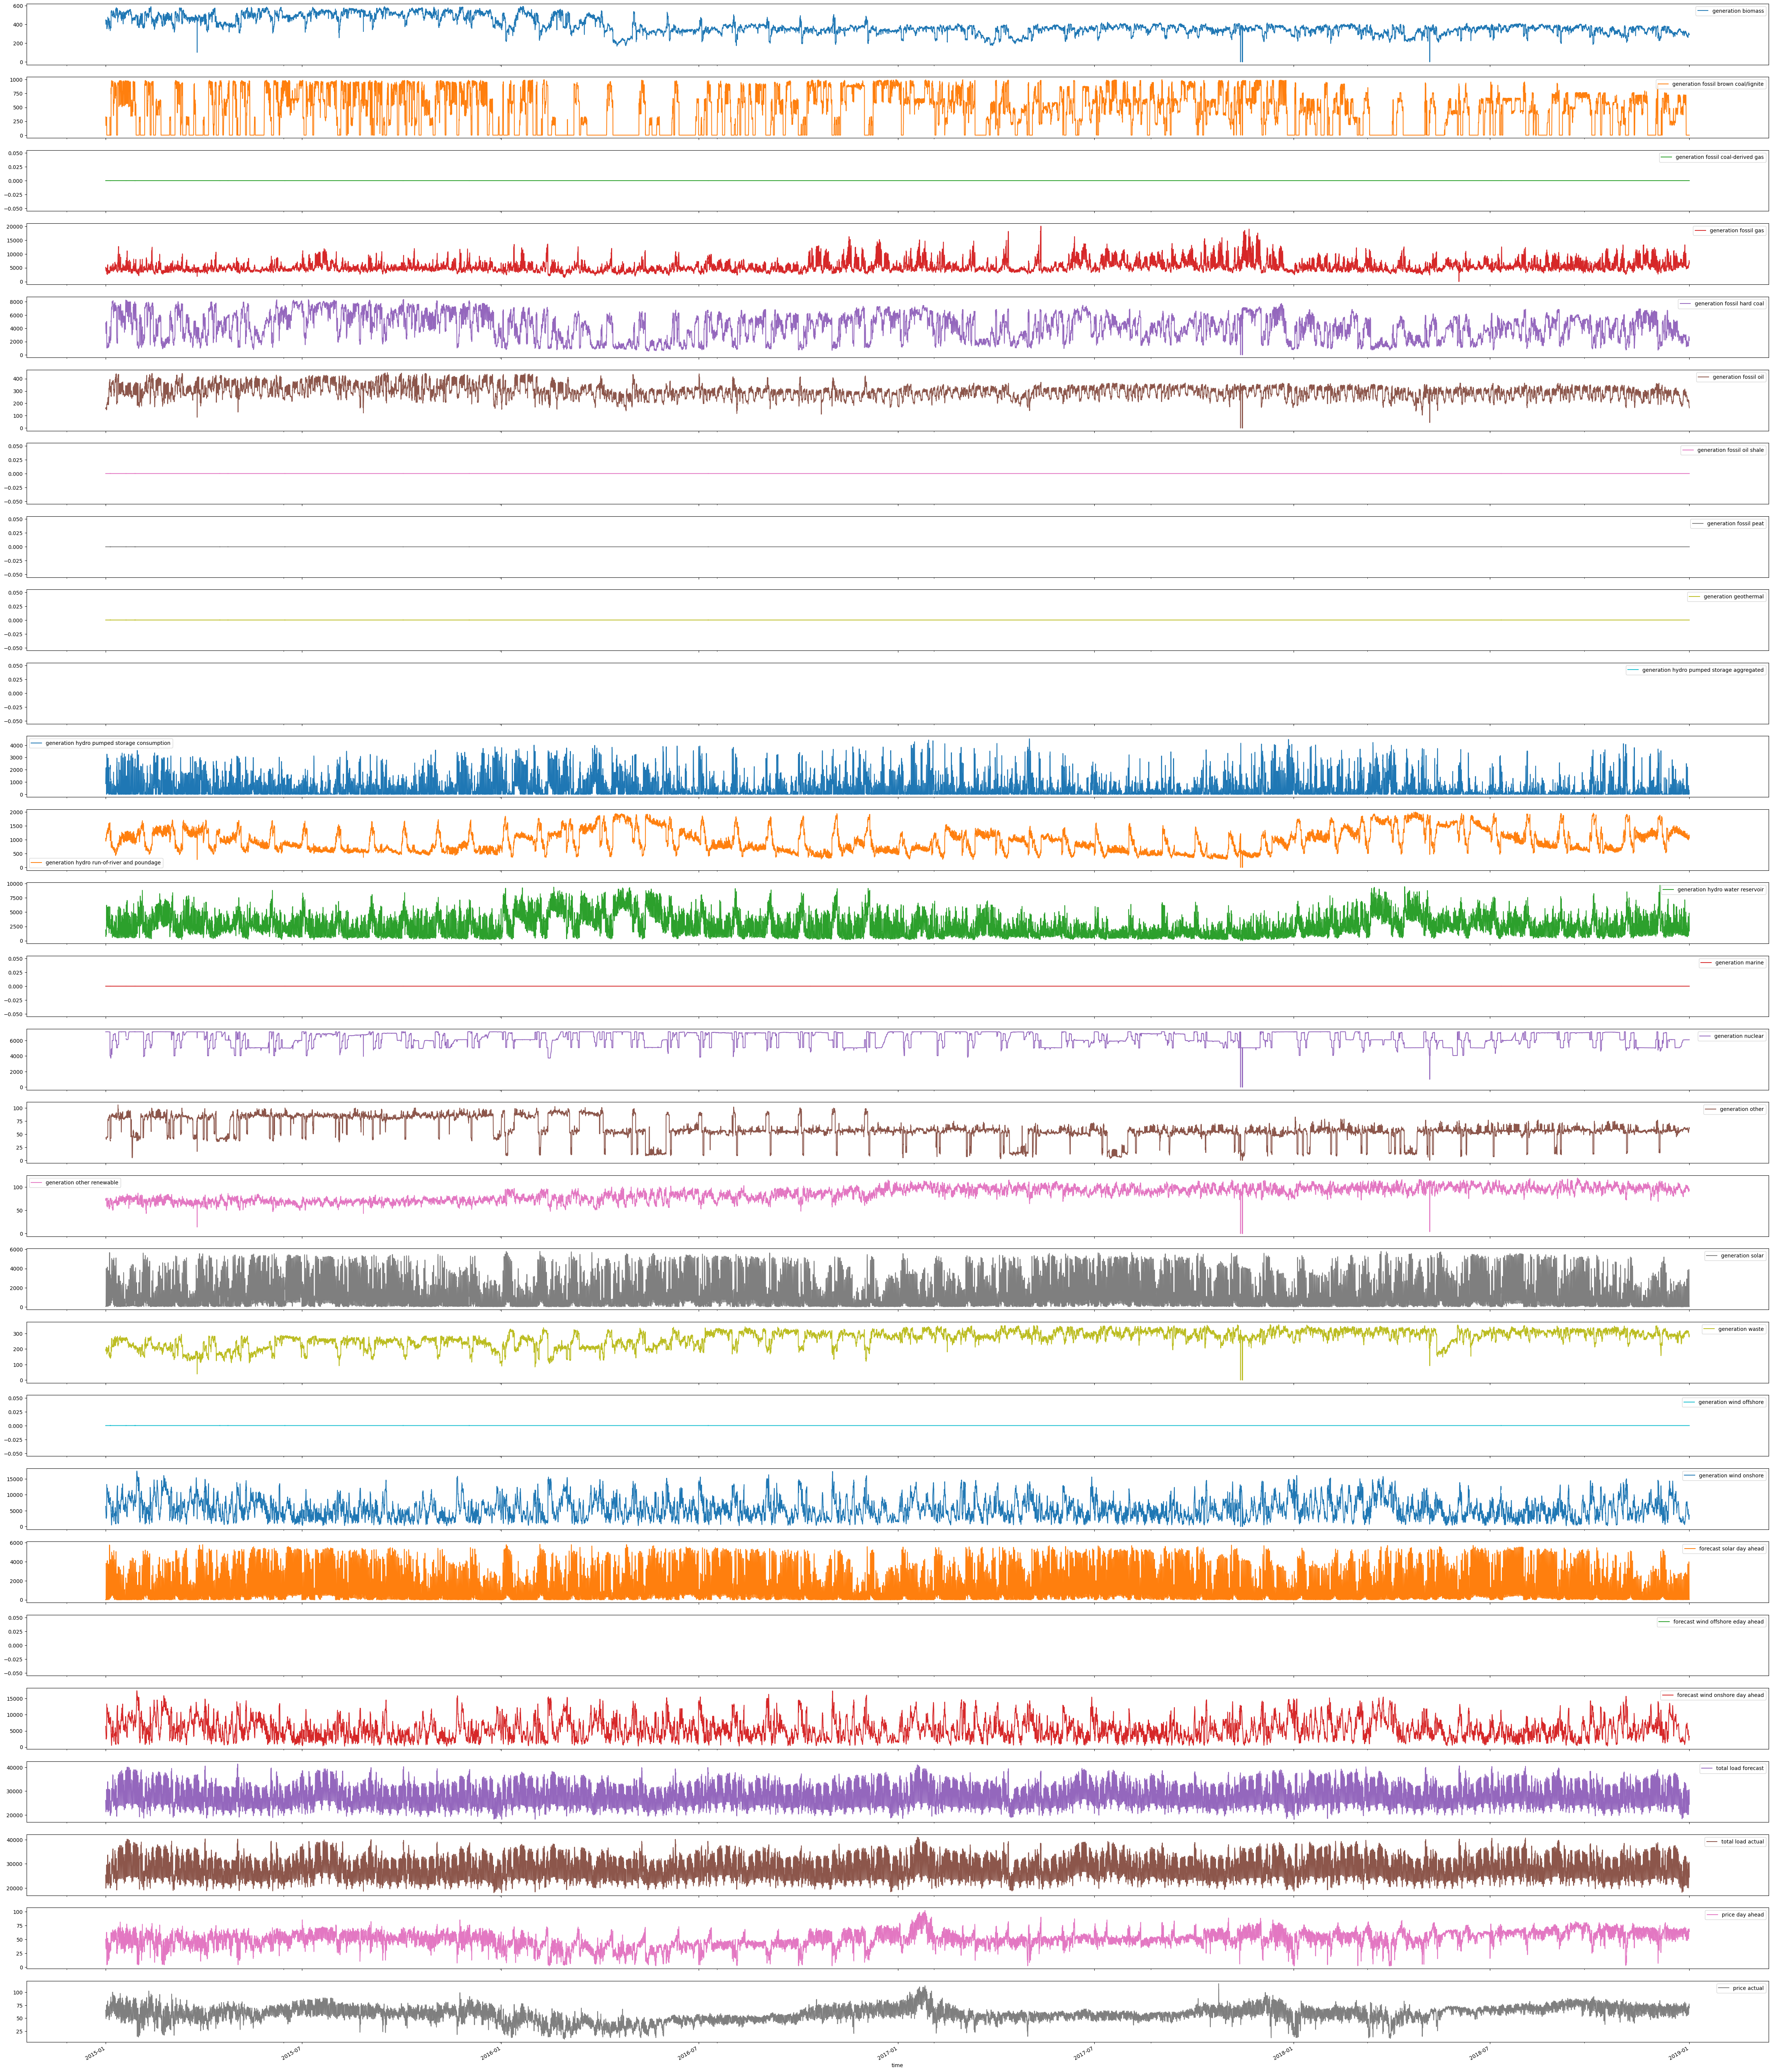

In [325]:
#Plotting the energy dataset
energy_df.plot(subplots=True, figsize=(60, 80))

We remark that we do not have data for these data : 
- **generation hydro pumped storage aggregated**
- **forecast wind offshore eday ahead**

On the other hand, we notice that their are data for which there is only zeros.

In [326]:
#the columns of the energy dataset for which the percentage of missing values is equal to 100%
print('The columns of the energy dataset for which the percentage of missing values is equal to 100% are: \n')
print(energy_df.columns[energy_df.isnull().mean()==1].to_list(), '\n')

The columns of the energy dataset for which the percentage of missing values is equal to 100% are: 

['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'] 



In [327]:
#columns for which data is only zeros
print('Columns for which data is only zeros are:')
energy_df.columns[(energy_df.sum() == 0)].to_list()

Columns for which data is only zeros are:


['generation fossil coal-derived gas',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation marine',
 'generation wind offshore',
 'forecast wind offshore eday ahead']

## Weather Dataset

In [328]:
#List of columns of the weather dataset
print('The columns of the weather dataset are: \n')
print(weather_df.columns, '\n')

The columns of the weather dataset are: 

Index(['city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon'],
      dtype='object') 



array([<AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>],
      dtype=object)

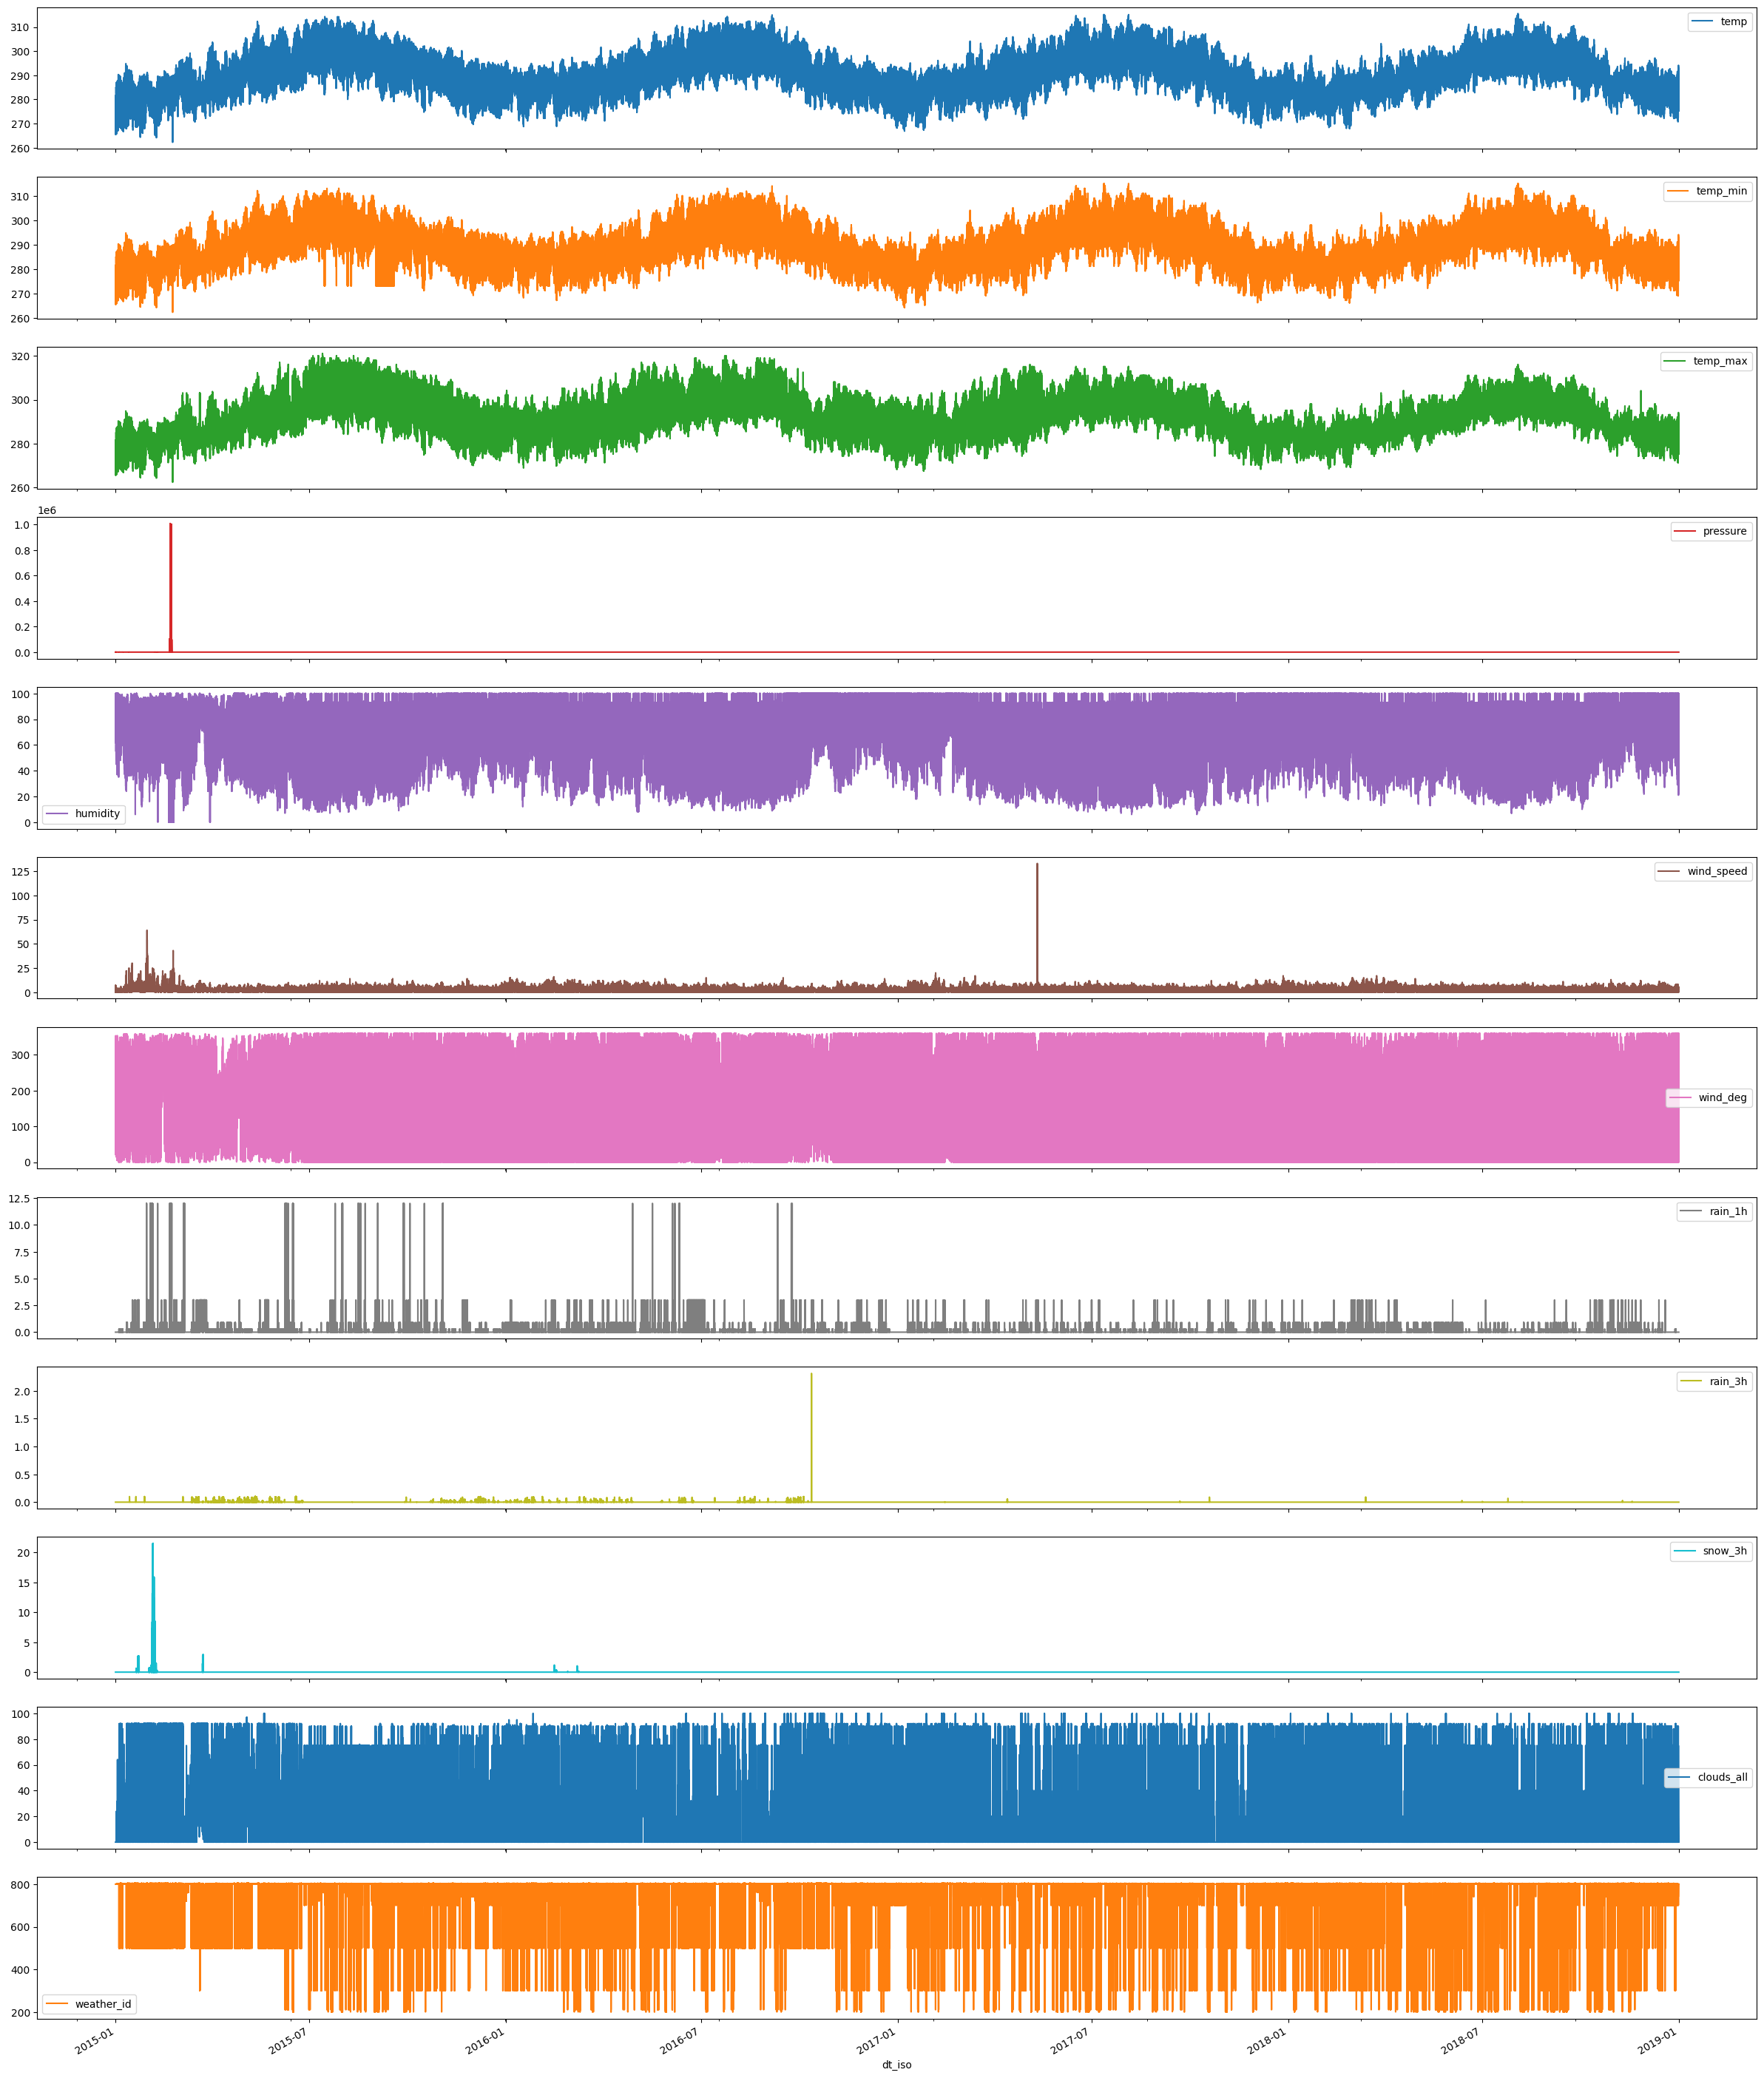

In [329]:
#Plotting the weather dataset
weather_df.plot(subplots=True, figsize=(30, 40))

We remark that some data of the weather dataset have visible outliers. We will deal with them later.
- **pressure**
- **wind_speed**
- **rain_3h**

# Data Cleaning and Preprocessing

#### Managing missing values and zeros

There is missing values and zeros only in the energy dataset. So, we decide to drop from the energy dataset the columns with missing values and zeros.

In [330]:
#dropping the columns of the energy dataset for which the percentage of missing values is equal to 100%
energy_df.drop(energy_df.columns[energy_df.isnull().mean()==1].to_list(), axis=1, inplace=True)

#dropping columns of energy dataset that have only zeros
zeros_columns = energy_df.columns[(energy_df.sum() == 0)].to_list()
energy_df.drop(zeros_columns, axis=1, inplace=True)

#### Managing duplicates

We remark that there is more number of observations in energy dataset than in weather dataset for each city. In fact:

In [331]:
print(f'There is {len(energy_df)} observations in the energy dataset.', '\n')

print(f'There is {len(weather_df)} observations in the weather dataset, with:')
for city in weather_df['city_name'].unique():
    print(f'- {len(weather_df[weather_df["city_name"] == city])} observations in the weather dataset about {city}.')


There is 35064 observations in the energy dataset. 

There is 178396 observations in the weather dataset, with:
- 35145 observations in the weather dataset about Valencia.
- 36267 observations in the weather dataset about Madrid.
- 35951 observations in the weather dataset about Bilbao.
- 35476 observations in the weather dataset about  Barcelona.
- 35557 observations in the weather dataset about Seville.


So we look for duplicates:

In [332]:
#duplicates in energy dataset
n_energy_dup = energy_df.reset_index().duplicated(subset=['time']).sum()
print(f'There is {n_energy_dup} duplicated rows in the energy dataset.')

#duplicates in weather dataset
n_weather_dup = weather_df.reset_index().duplicated(subset=['dt_iso', 'city_name']).sum()
print(f'There is {n_weather_dup} duplicated rows in the weather dataset.')


There is 0 duplicated rows in the energy dataset.
There is 3076 duplicated rows in the weather dataset.


We will drop the duplicates in the weather dataset keeping the last observation.

In [333]:
weather_df = weather_df.reset_index().drop_duplicates(subset=['dt_iso', 'city_name'], keep='last').set_index('dt_iso')

We verify again the number of observations in each dataset:

In [334]:
print(f'There is {len(energy_df)} observations in the energy dataset.', '\n')

print(f'There is {len(weather_df)} observations in the weather dataset, with:')
for city in weather_df['city_name'].unique():
    print(f'- {len(weather_df[weather_df["city_name"] == city])} observations in the weather dataset about {city}.')

There is 35064 observations in the energy dataset. 

There is 175320 observations in the weather dataset, with:
- 35064 observations in the weather dataset about Valencia.
- 35064 observations in the weather dataset about Madrid.
- 35064 observations in the weather dataset about Bilbao.
- 35064 observations in the weather dataset about  Barcelona.
- 35064 observations in the weather dataset about Seville.


We have now the same number of observations in each dataset.

#### Managing outliers

First of all, we visualize the boxplot of the data to see the outliers for both datasets.

**Boxplot to visualize outliers**

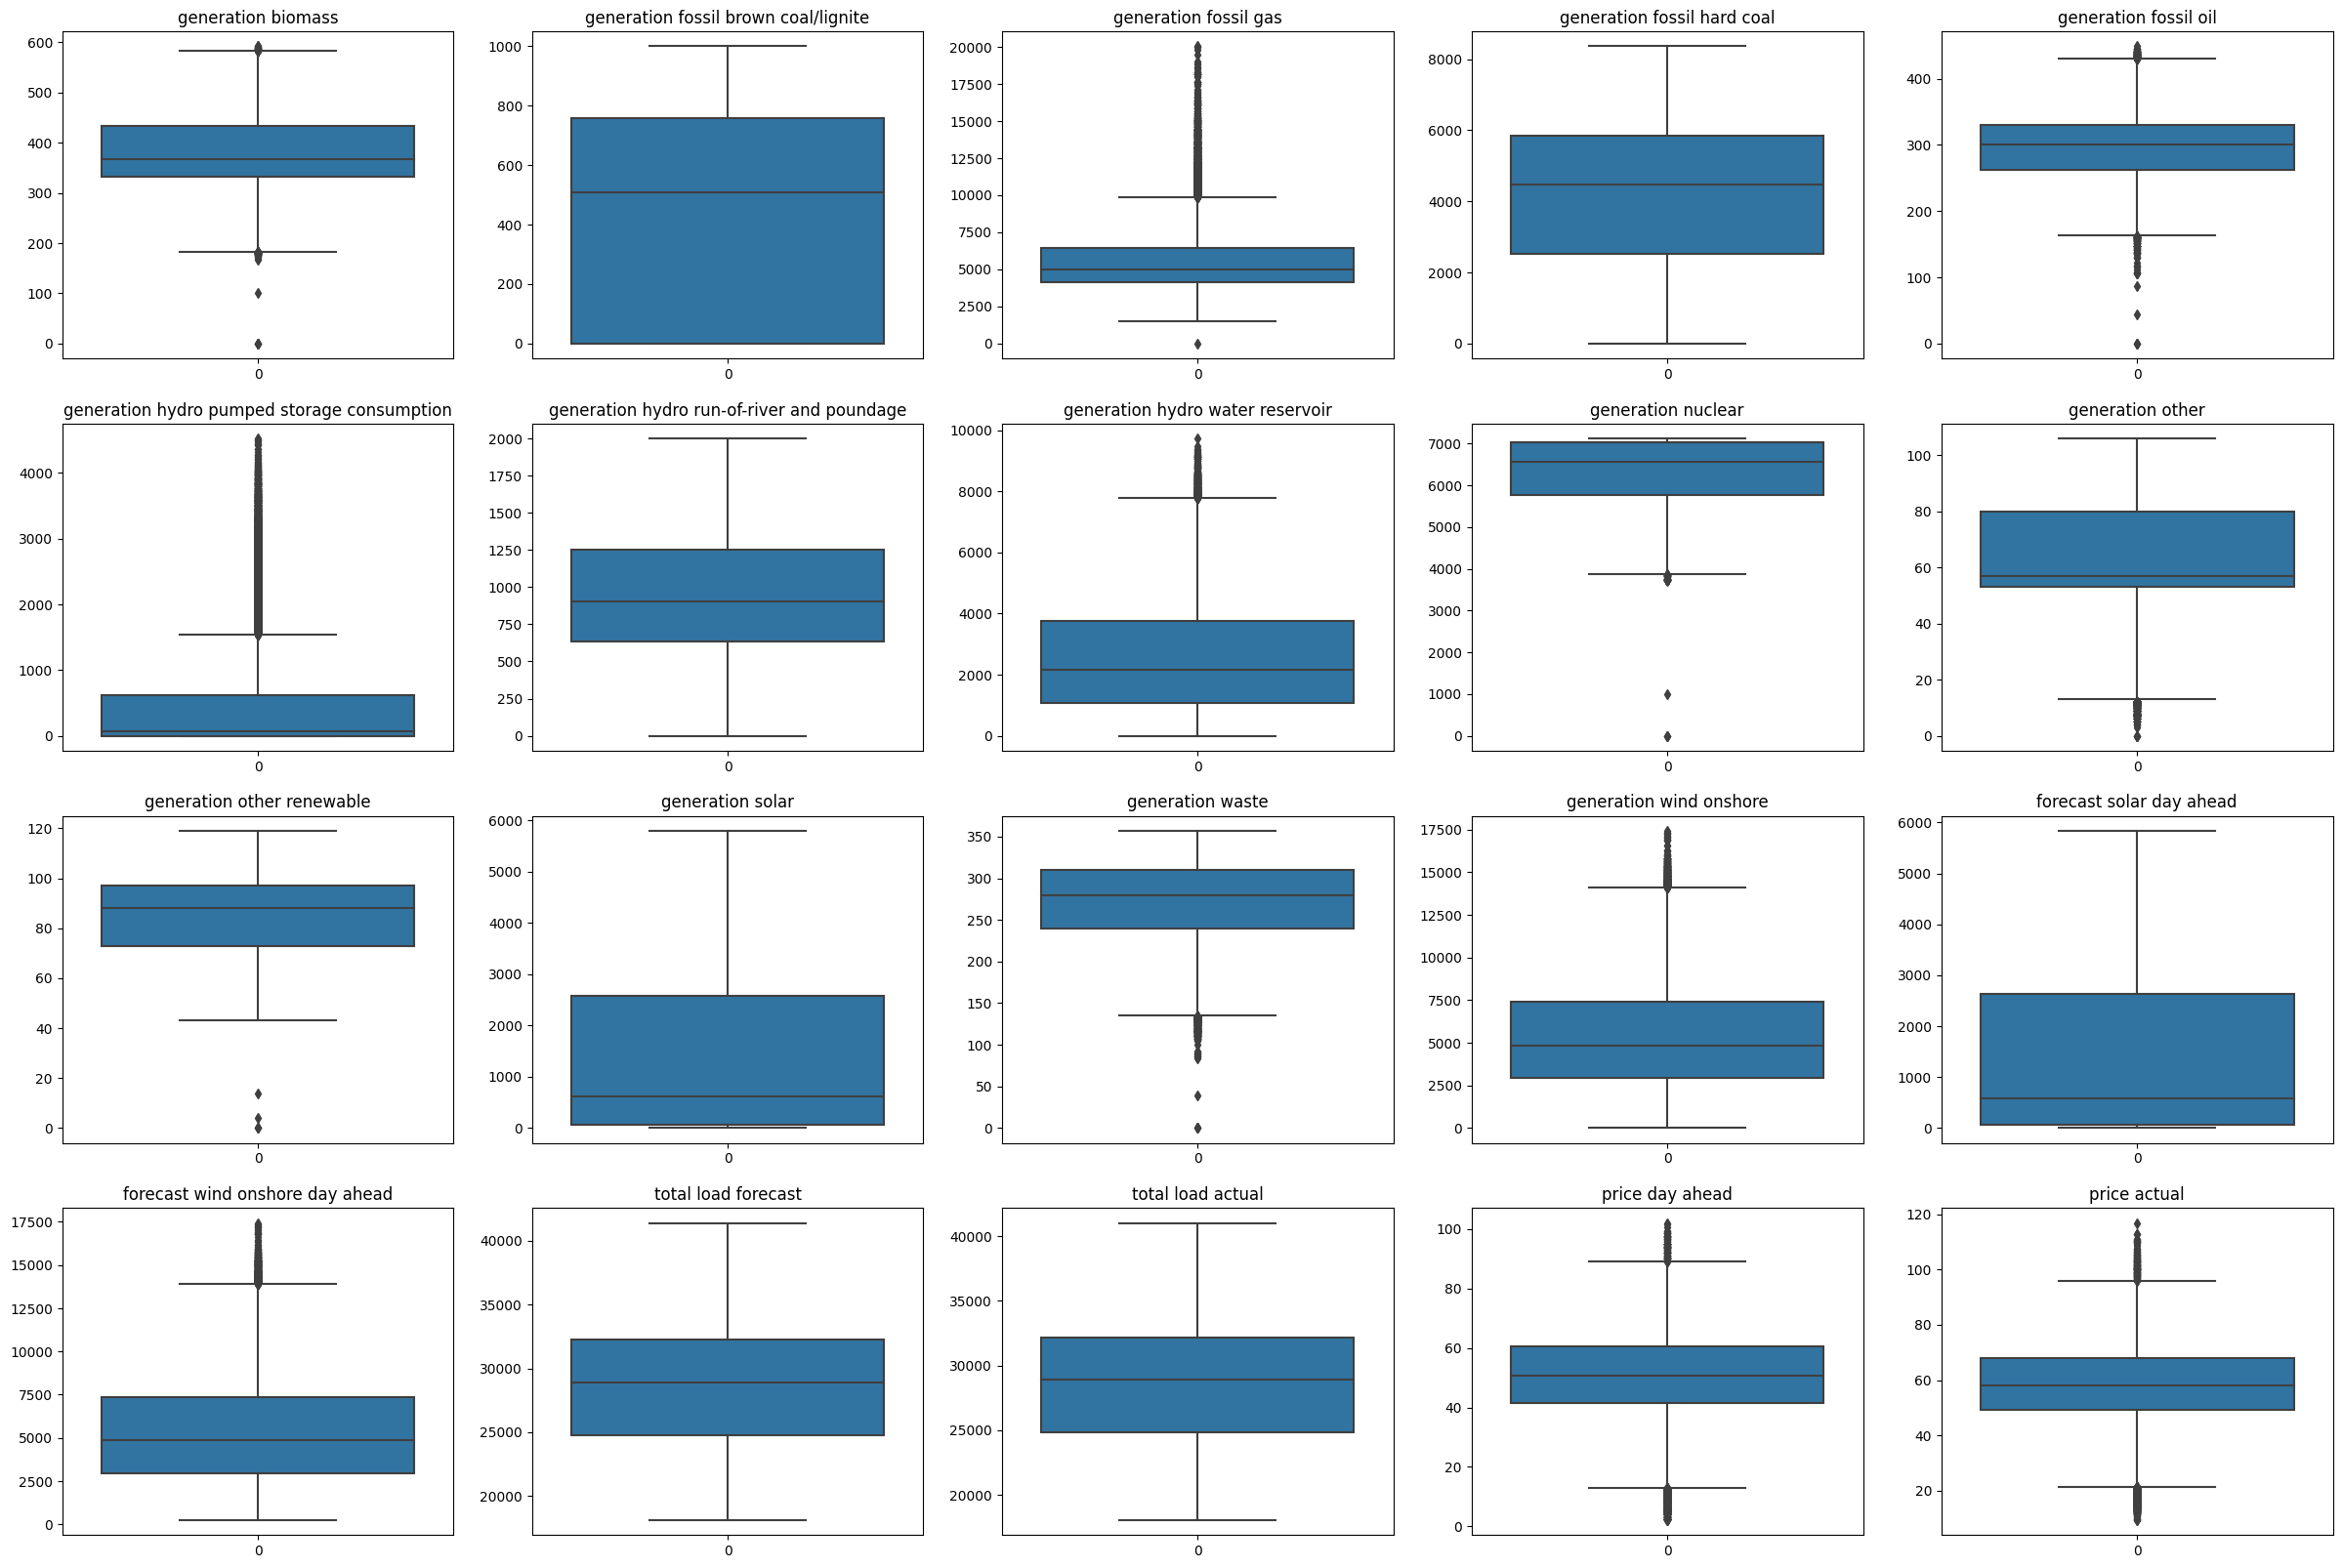

In [335]:
#outliers in the energy dataset using boxplot
plt.figure(figsize=(30, 20))
for col in energy_df.columns:
    plt.subplot(4, 5, list(energy_df.columns).index(col)+1)
    sns.boxplot(data=energy_df[col])
    plt.title(f'{col}')

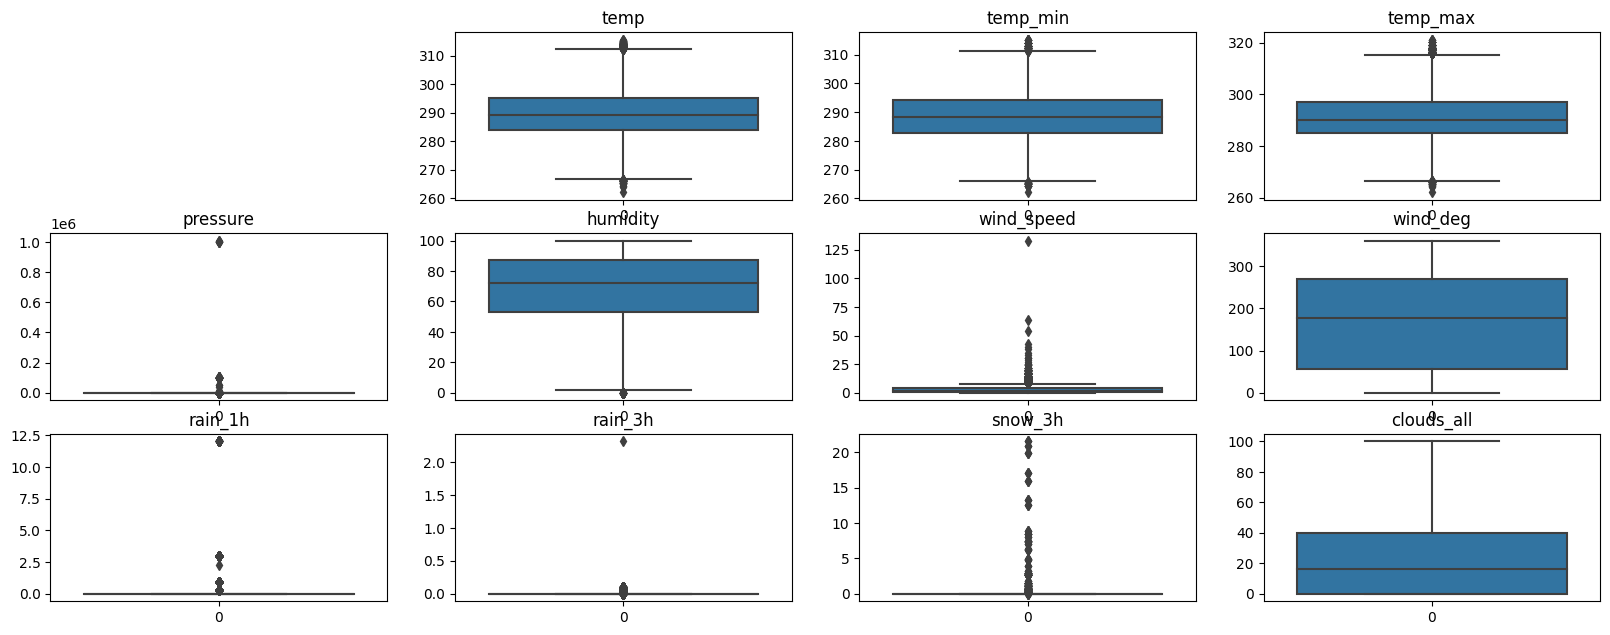

In [336]:
#outliers in the weather dataset using boxplot
cols_rm = []
for col in weather_df.columns:
    if(type(weather_df[col][0]) == str):
        cols_rm.append(col)
cols_quant = weather_df.columns
cols_quant = cols_quant.drop(cols_rm)
cols_quant = cols_quant.drop(['weather_id'])

plt.figure(figsize=(20, 10))
for col in weather_df[cols_quant].columns:
    plt.subplot(4, 4, list(weather_df.columns).index(col)+1)
    sns.boxplot(data=weather_df[col])
    plt.title(f'{col}')

We have identified the columns of both datasets that contain outliers.

In [337]:
print('The outliers in the energy dataset are:')
outliers_energy = ['generation biomass', 'generation fossil oil', 'generation nuclear','generation other renewable', 'generation waste']
print(outliers_energy, '\n')

print('The outliers in the weather dataset are:')
outliers_weather = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h', 'snow_3h']
print(outliers_weather)

The outliers in the energy dataset are:
['generation biomass', 'generation fossil oil', 'generation nuclear', 'generation other renewable', 'generation waste'] 

The outliers in the weather dataset are:
['pressure', 'wind_speed', 'rain_1h', 'rain_3h', 'snow_3h']


**IQR method to detect outliers**

We will now use an IQR method to detect outliers and replace them with the median of the column:

In [338]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.05)
    Q3 = column.quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.75 * IQR
    upper_bound = Q3 + 1.75 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Apply the function to each column in the DataFrame
outliers_dict_energy = {col: detect_outliers_iqr(energy_df[col]) for col in energy_df.columns}
outliers_dict_weather = {col: detect_outliers_iqr(weather_df[col]) for col in weather_df[cols_quant].columns}

In [339]:
print('The columns that have outliers detected by the IQR for the energy dataset:', '\n')
for col in outliers_dict_energy:
    if(outliers_dict_energy[col].sum()>0):
        print(f'{col}')

The columns that have outliers detected by the IQR for the energy dataset: 

generation nuclear


In [340]:
print('The columns that have outliers detected by the IQR for the weather dataset:', '\n')
for col in outliers_dict_weather:
    if(outliers_dict_weather[col].sum()>0):
        print(f'{col}')

The columns that have outliers detected by the IQR for the weather dataset: 

pressure
wind_speed
rain_1h
rain_3h
snow_3h


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


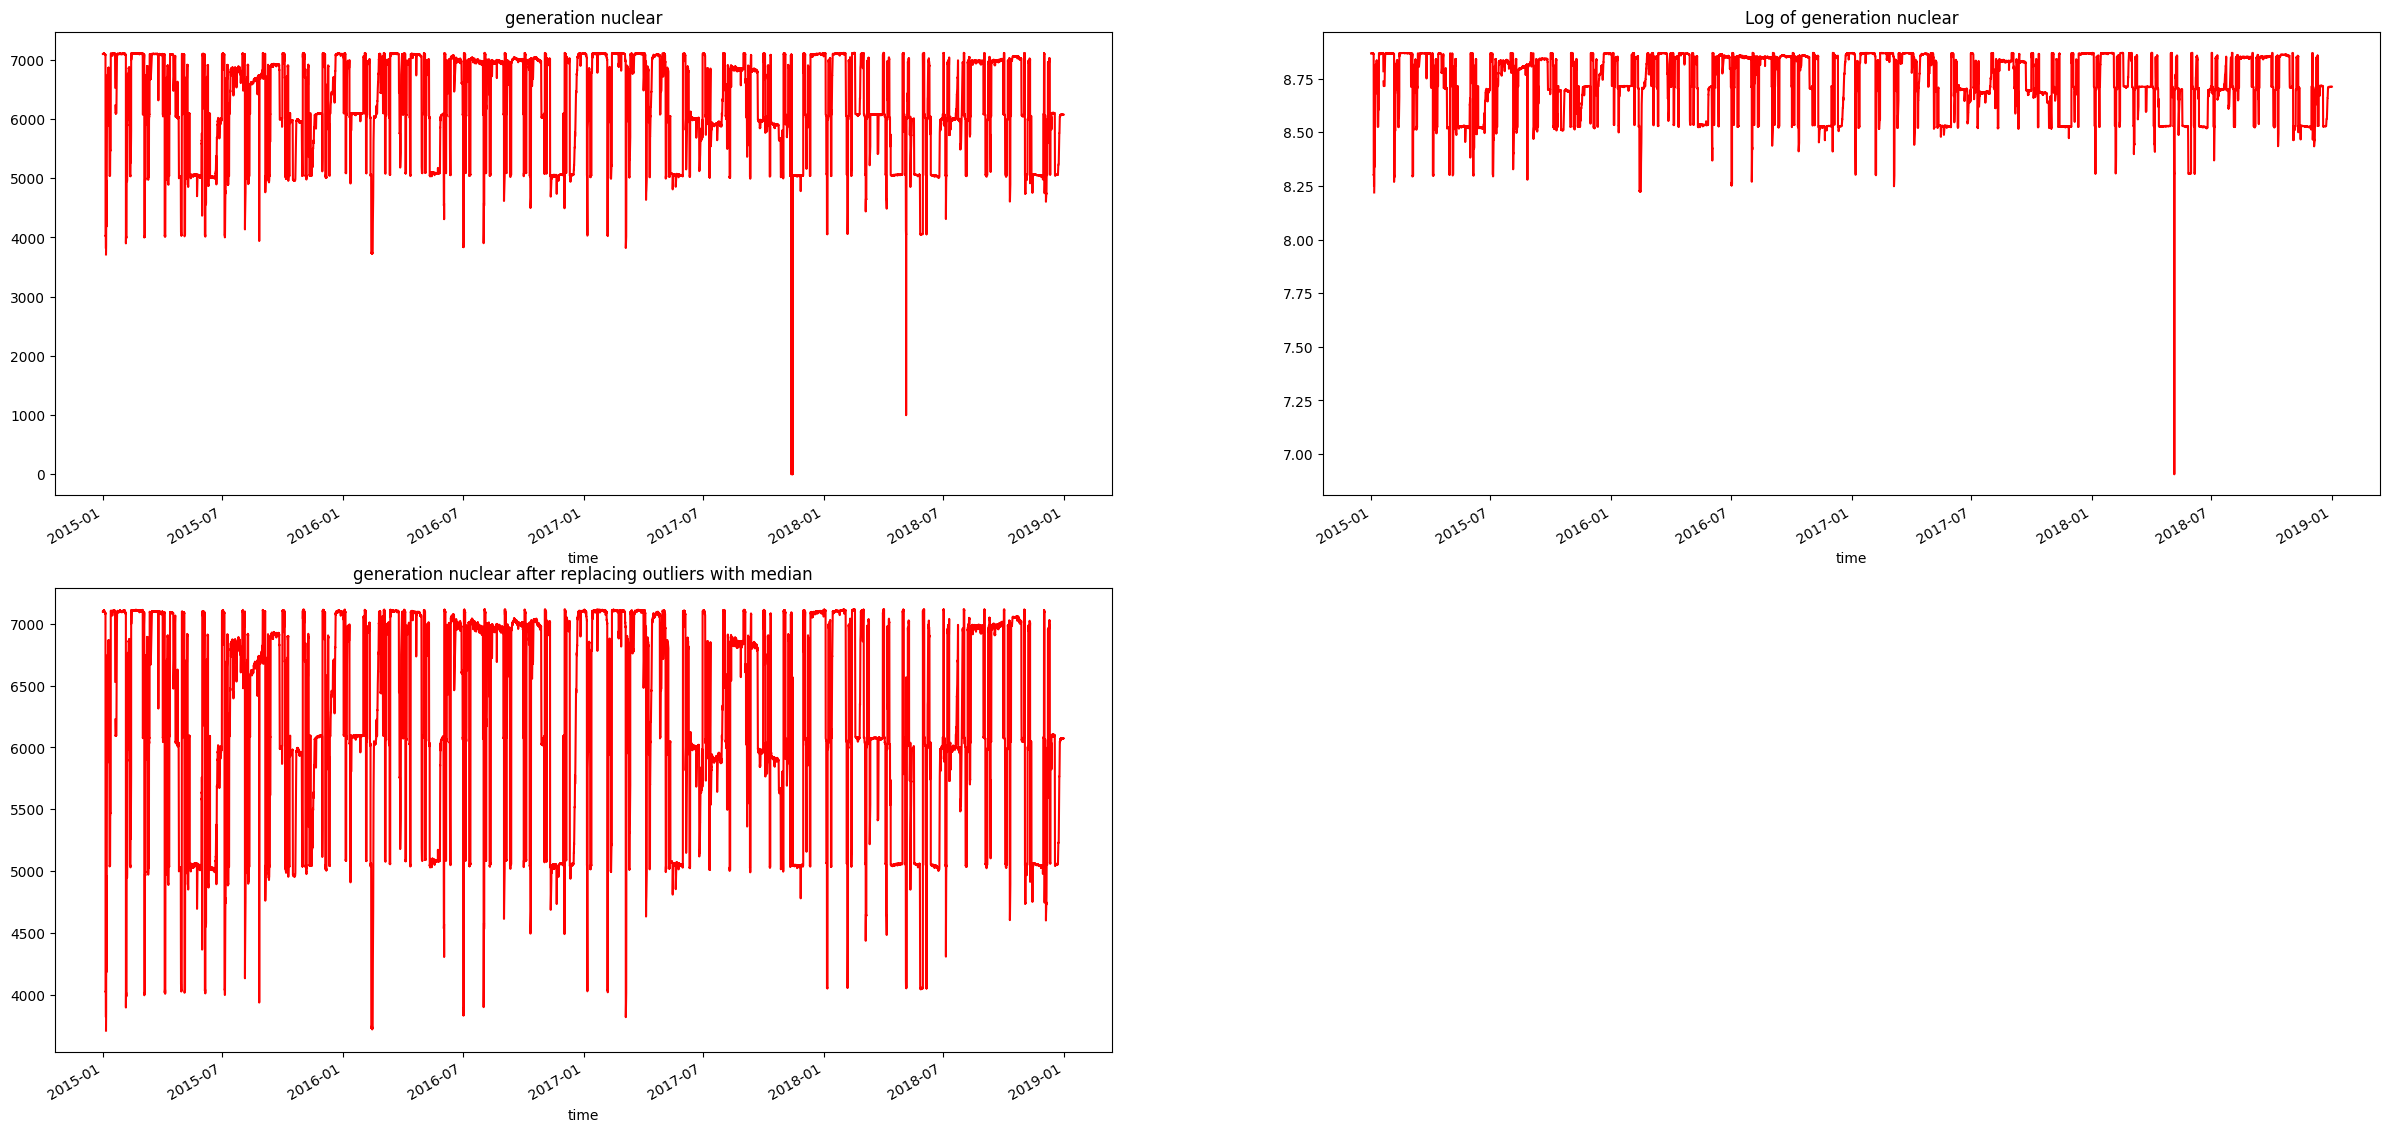

In [341]:
#copy of the energy dataset for replacing outliers with the median
energy_df_copy = energy_df.copy(deep=True)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
i=0
for col in outliers_dict_energy:
    if(outliers_dict_energy[col].sum()>0):
        plt.figure(figsize=(30, 15))
        plt.subplot(2, 2, 1)
        #plotting the data without any changes on outliers
        energy_df[col].plot(color = colors[i])
        plt.title(f'{col}')
        
        #plotting the log data without any changes on outliers
        plt.subplot(2, 2, 2)
        np.log(energy_df[col]).plot(color = colors[i])
        plt.title(f'Log of {col}')
        
        #plotting the data after replacing outliers with median
        energy_df_copy[col][outliers_dict_energy[col]] = energy_df_copy[col].median()
        plt.subplot(2, 2, 3)
        energy_df_copy[col].plot(color = colors[i])
        plt.title(f'{col} after replacing outliers with median')
        i+=1
        plt.show()

We deduce that we will replace for the generation nuclear column the outliers with the median of the column.

In [342]:
energy_df['generation nuclear'][outliers_dict_energy['generation nuclear']] = energy_df['generation nuclear'].median()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/zw/dpjp09bn4_l8yjw9zyyrfcmr0000gn/T/ipykernel_7218/4147302476.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_weather_df[col][outliers_dict_weather[col]] = copy_weather_df[col].median()


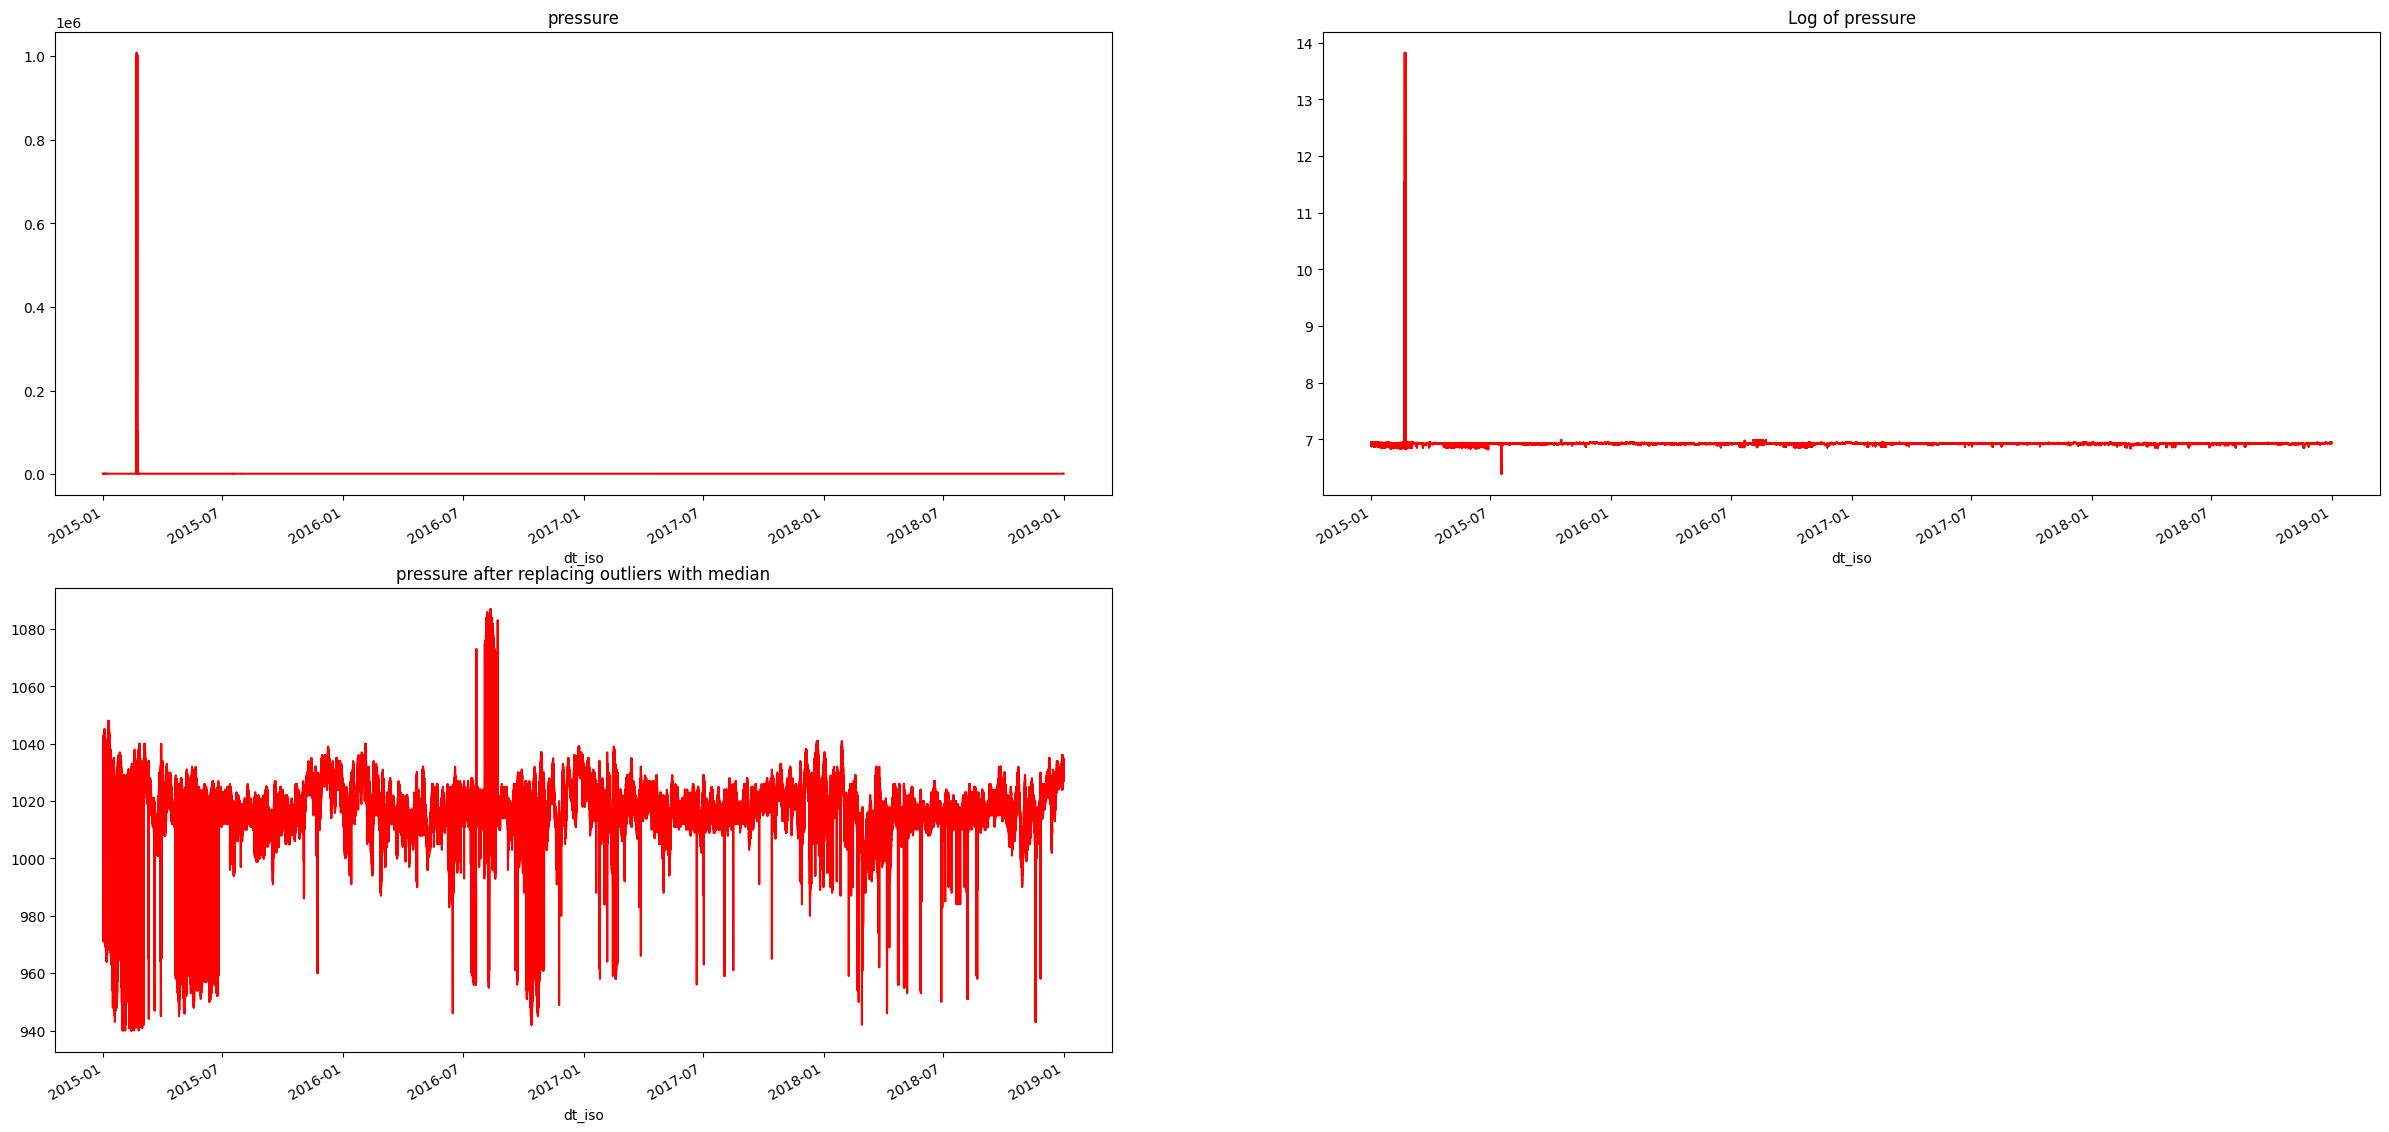

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/zw/dpjp09bn4_l8yjw9zyyrfcmr0000gn/T/ipykernel_7218/4147302476.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_weather_df[col][outliers_dict_weather[col]] = copy_weather_df[col].median()


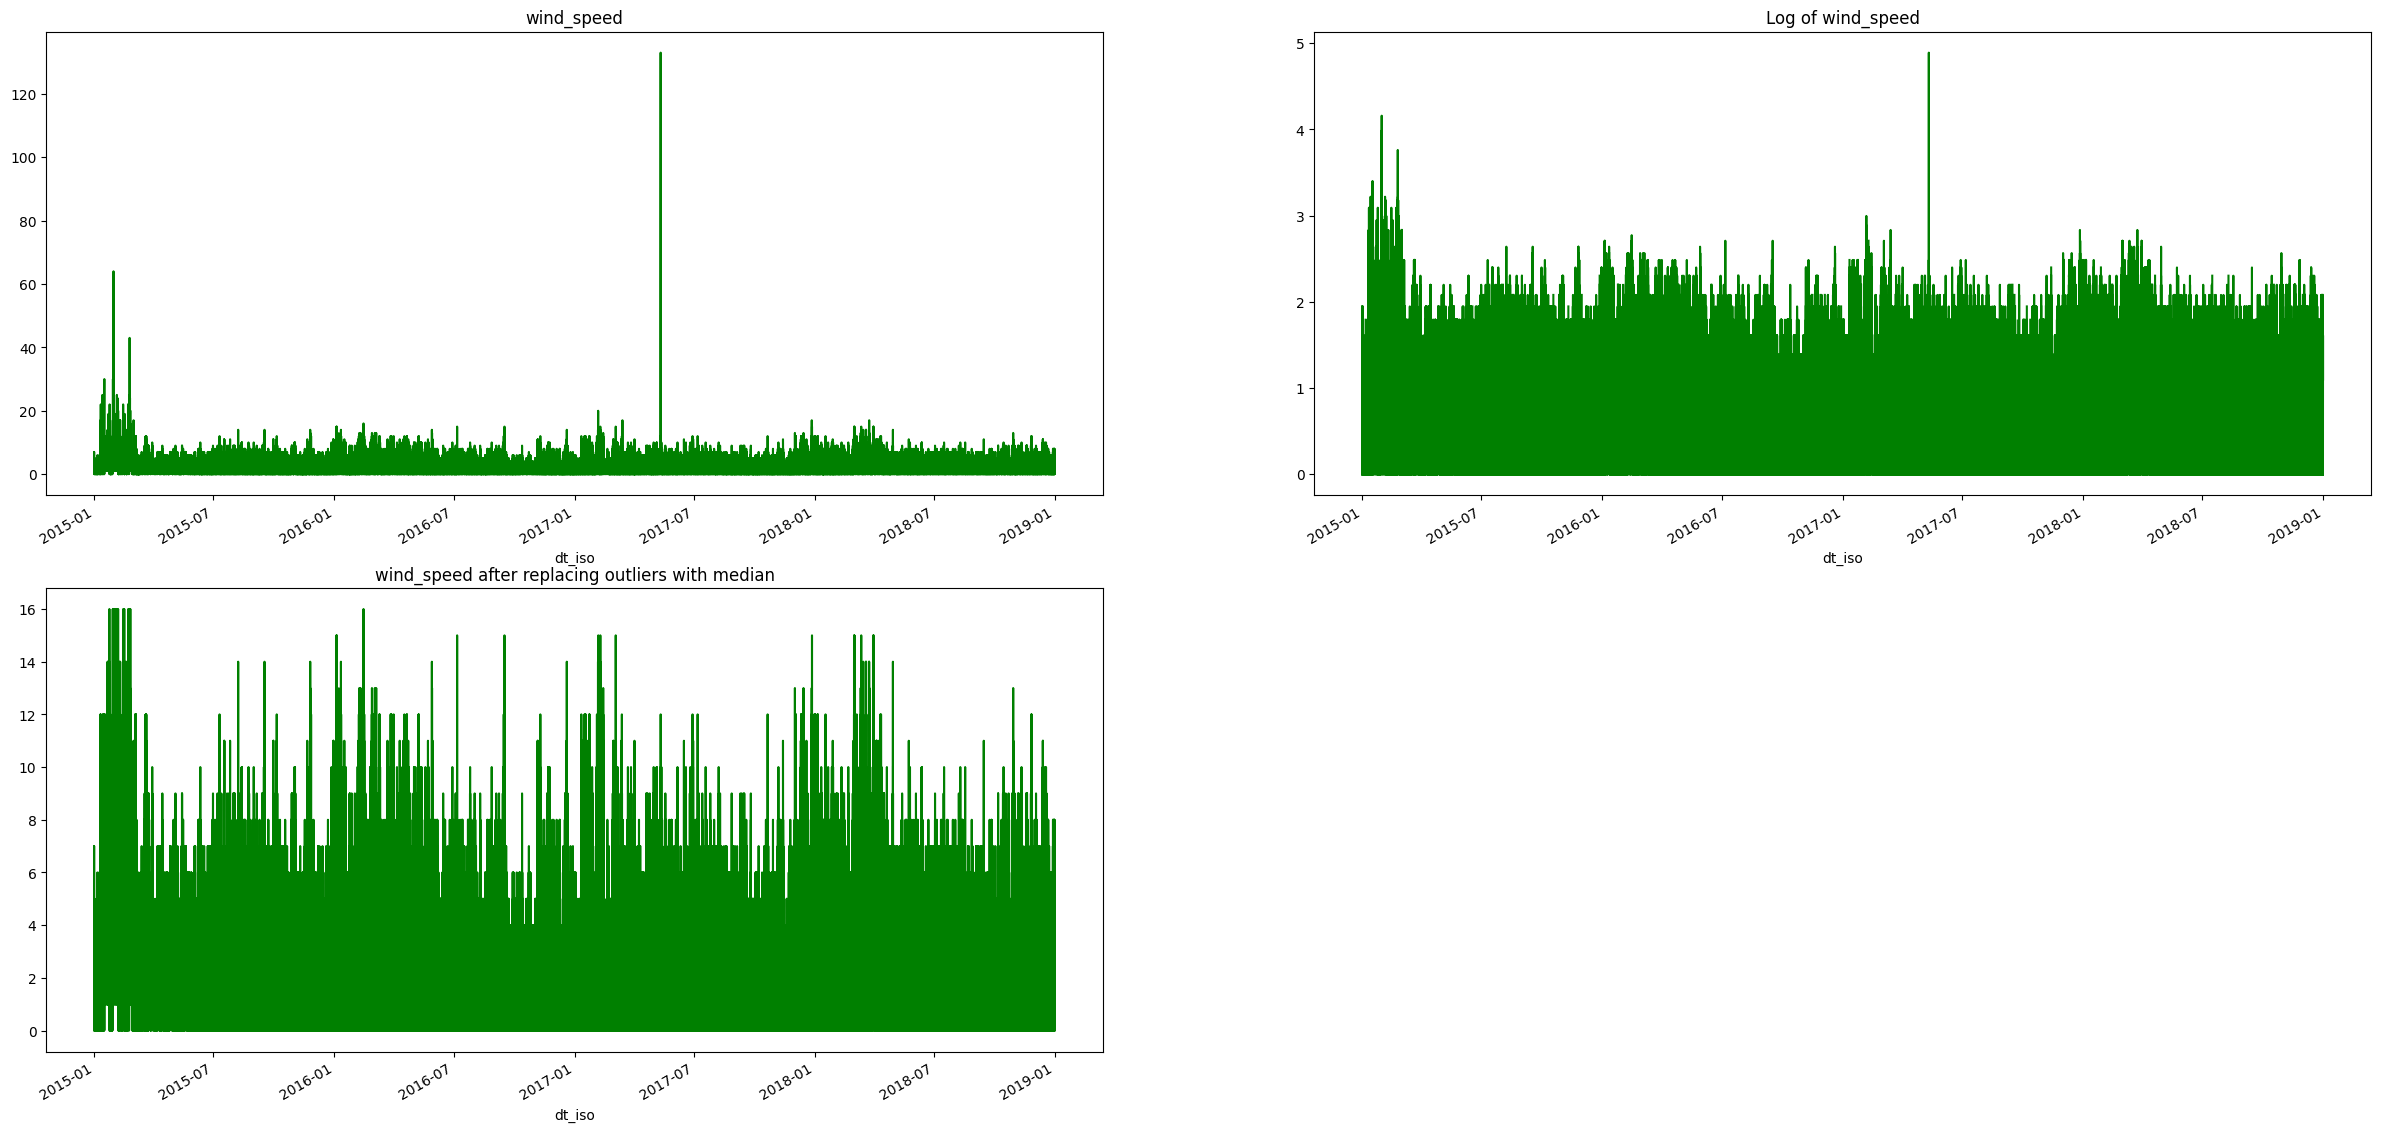

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/zw/dpjp09bn4_l8yjw9zyyrfcmr0000gn/T/ipykernel_7218/4147302476.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_weather_df[col][outliers_dict_weather[col]] = copy_weather_df[col].median()


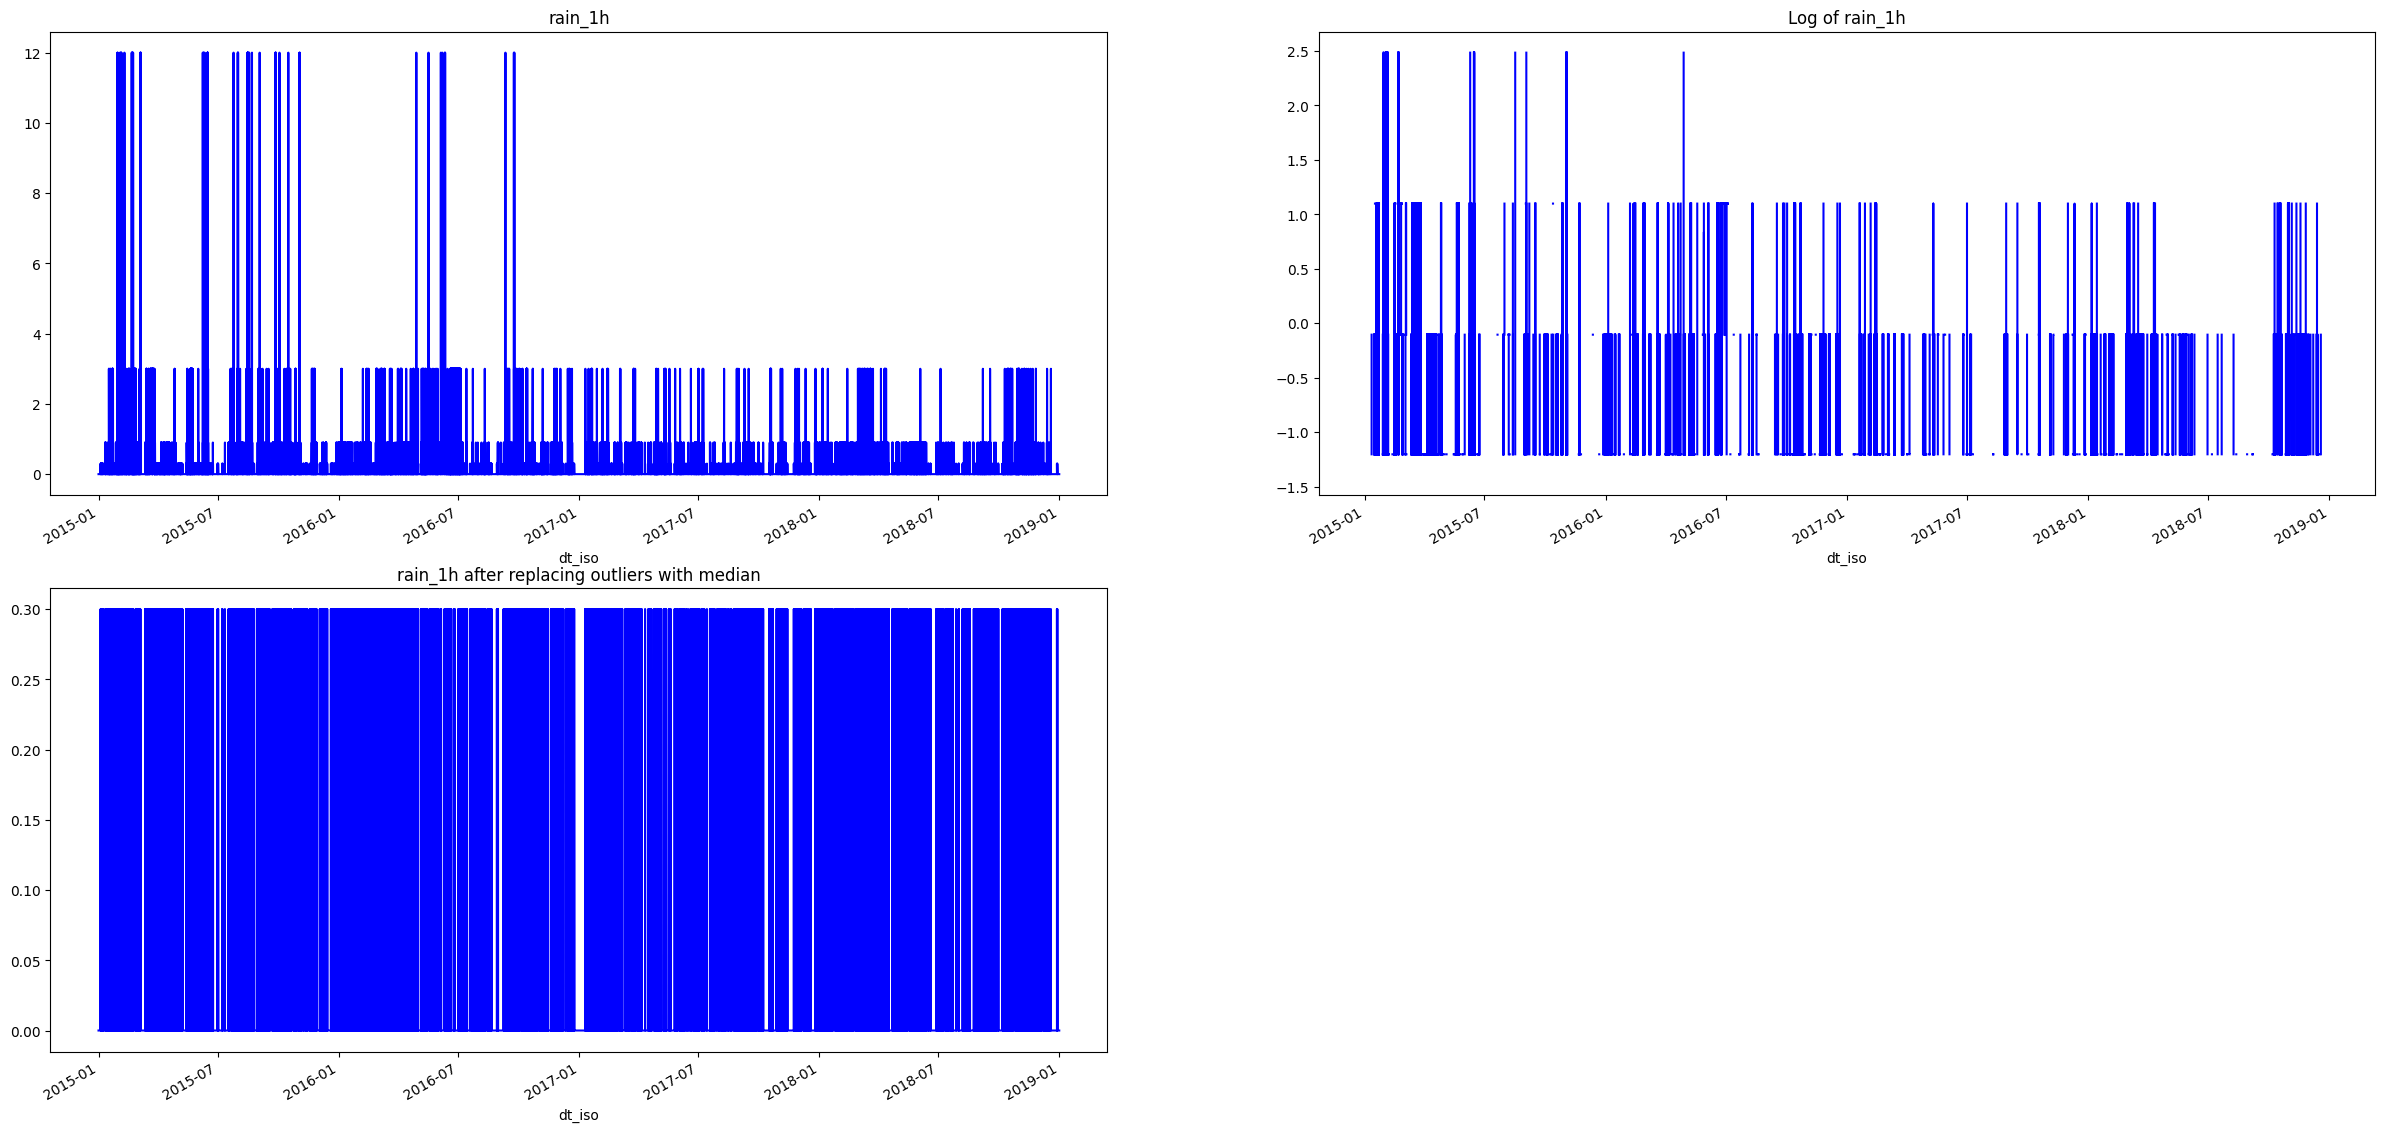

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/zw/dpjp09bn4_l8yjw9zyyrfcmr0000gn/T/ipykernel_7218/4147302476.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_weather_df[col][outliers_dict_weather[col]] = copy_weather_df[col].median()


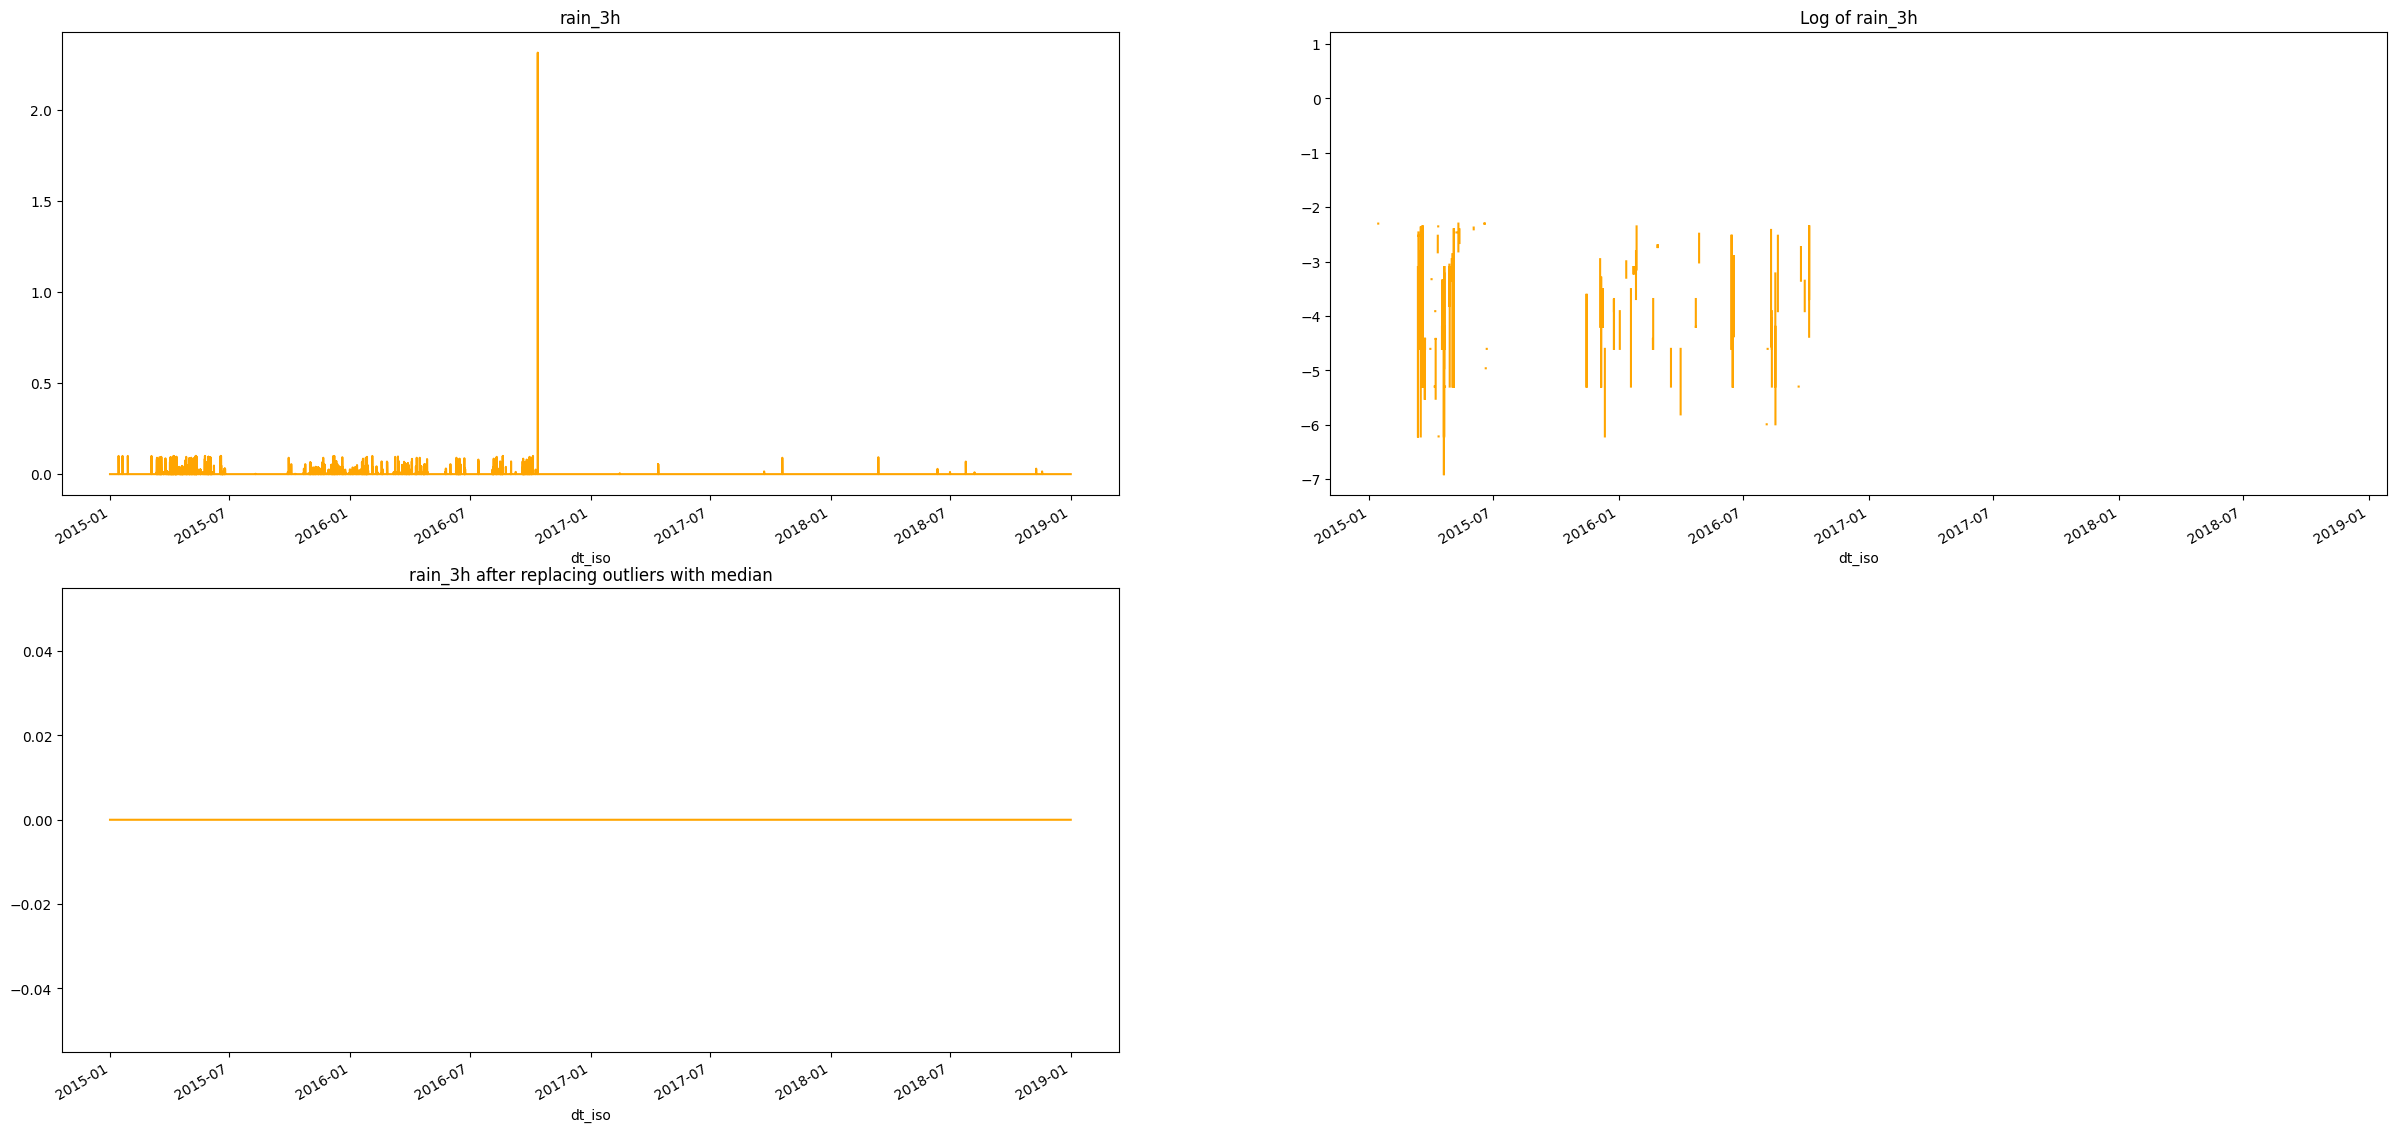

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/zw/dpjp09bn4_l8yjw9zyyrfcmr0000gn/T/ipykernel_7218/4147302476.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_weather_df[col][outliers_dict_weather[col]] = copy_weather_df[col].median()


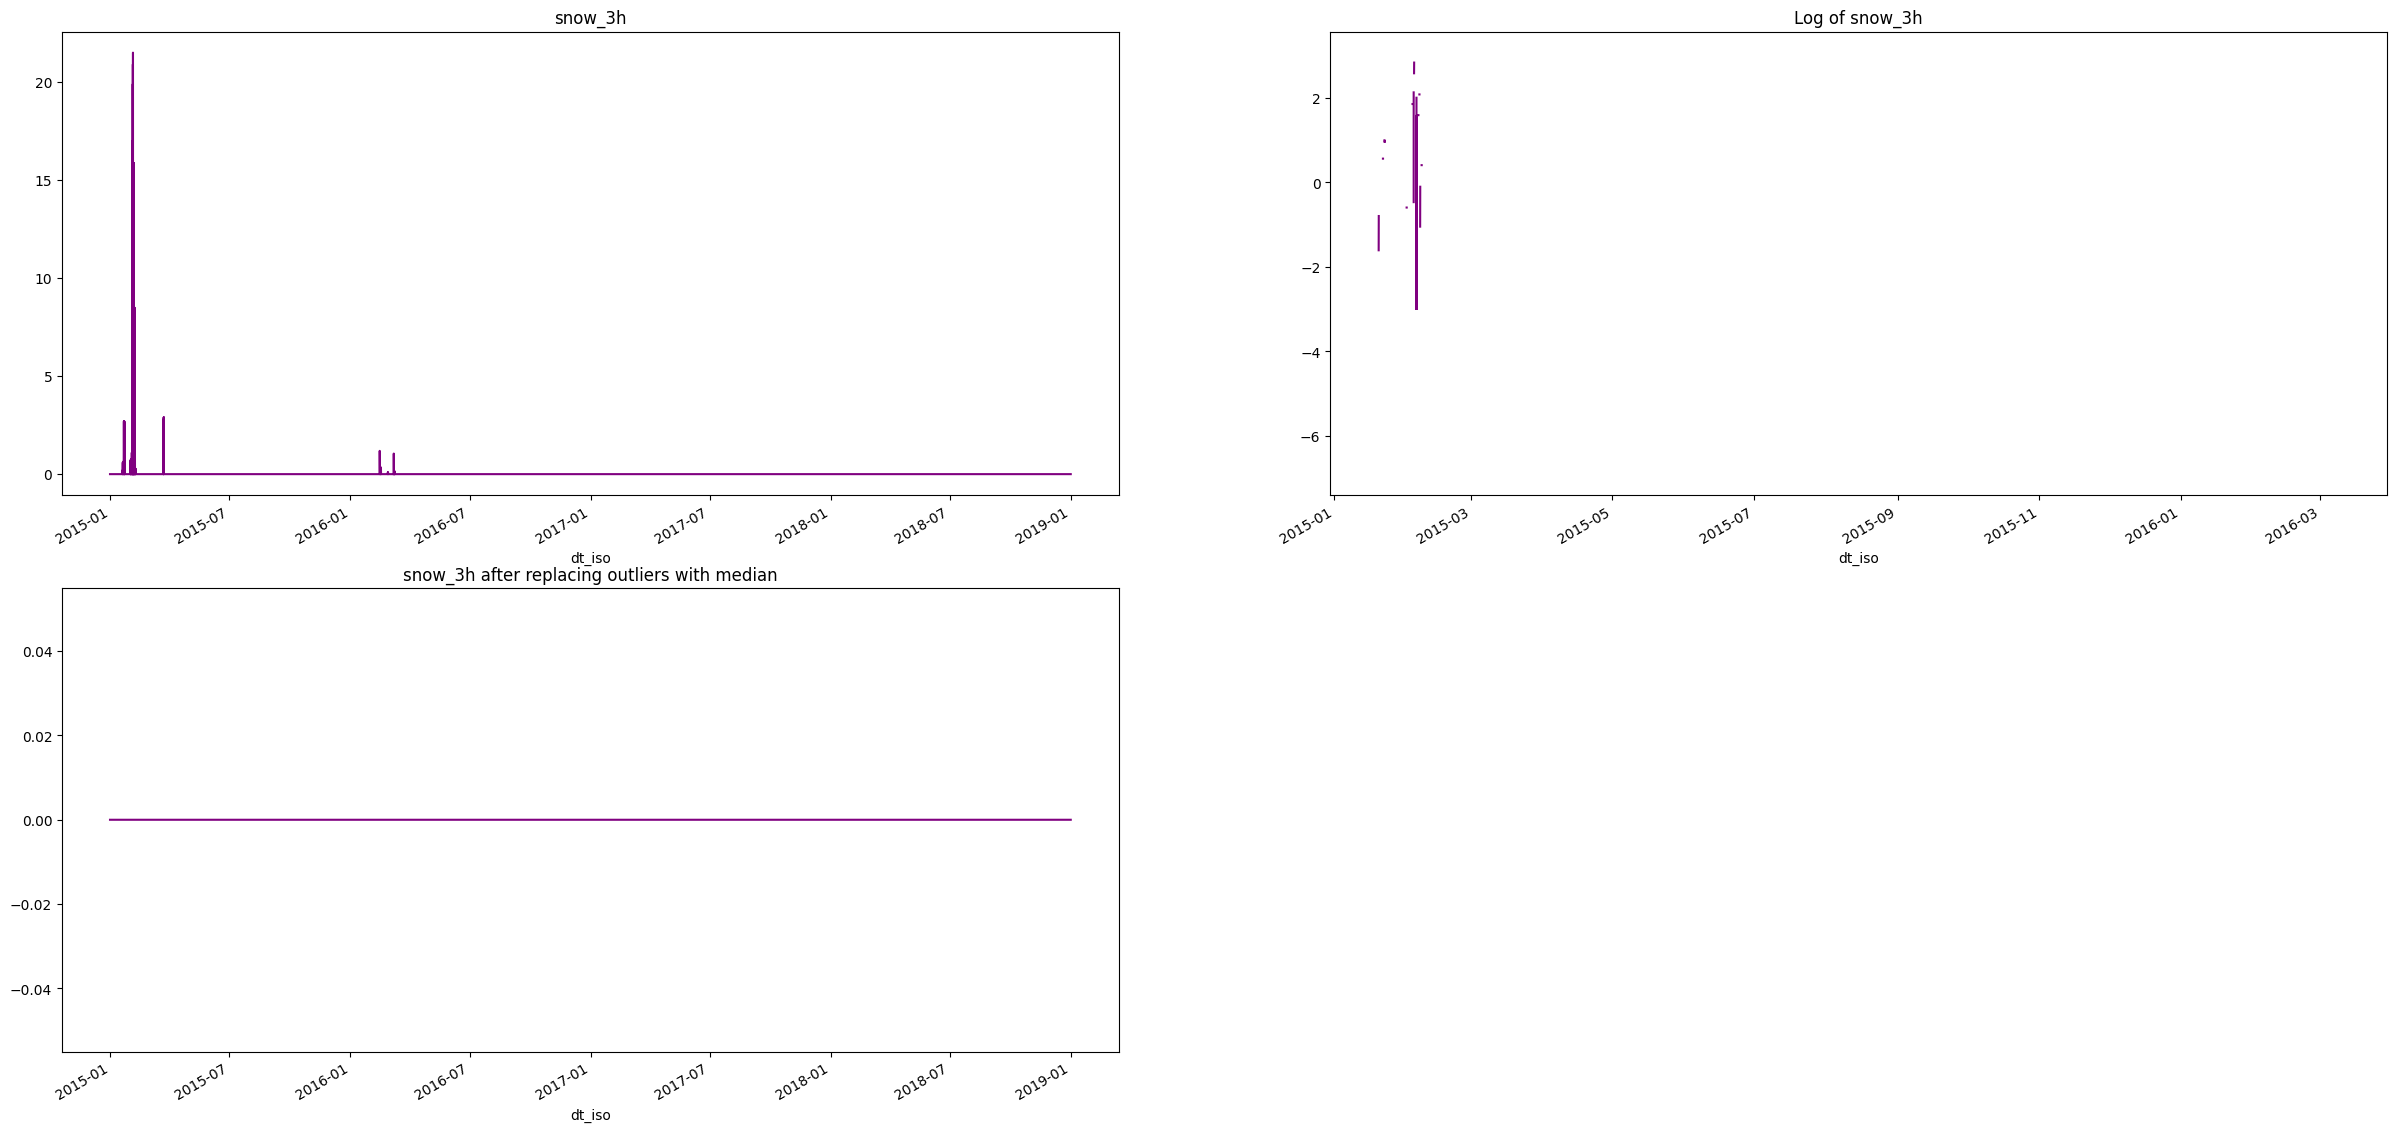

In [343]:
#copy of the weather dataset for replacing the outliers with median
copy_weather_df = weather_df.copy(deep=True)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'black', 'pink', 'brown', 'gray']
i=0
for col in outliers_dict_weather:
    if(outliers_dict_weather[col].sum()>0):
        plt.figure(figsize=(30, 15))
        plt.subplot(2, 2, 1)
        #plotting the data without any changes on outliers
        weather_df[col].plot(color = colors[i])
        plt.title(f'{col}')
        
        #plotting the log data without any changes on outliers
        plt.subplot(2, 2, 2)
        np.log(weather_df[col]).plot(color = colors[i])
        plt.title(f'Log of {col}')
        
        #plotting the data after replacing outliers with median
        copy_weather_df[col][outliers_dict_weather[col]] = copy_weather_df[col].median()
        plt.subplot(2, 2, 3)
        copy_weather_df[col].plot(color = colors[i])
        plt.title(f'{col} after replacing outliers with median')
        i+=1
        plt.show()

We deduce that we will replace the outliers with the median of the column for the following columns:
- **pressure**
- **wind_speed**

We will use the log for the following column:
- **rain_1h**

We will drop these columns because they do not have efficient data:
- **rain_3h**
- **snow_3h**

In [344]:
#replacing the outliers with median for pressure and wind_speed
weather_df['pressure'][outliers_dict_weather['pressure']] = weather_df['pressure'].median()
weather_df['wind_speed'][outliers_dict_weather['wind_speed']] = weather_df['wind_speed'].median()

#log transformation for rain_1h
weather_df['rain_1h'] = np.log(weather_df['rain_1h'])

#drop the columns rain_3h and snow_3h
weather_df.drop(['rain_3h', 'snow_3h'], axis=1, inplace=True)

/var/folders/zw/dpjp09bn4_l8yjw9zyyrfcmr0000gn/T/ipykernel_7218/1617378628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['pressure'][outliers_dict_weather['pressure']] = weather_df['pressure'].median()
/var/folders/zw/dpjp09bn4_l8yjw9zyyrfcmr0000gn/T/ipykernel_7218/1617378628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['wind_speed'][outliers_dict_weather['wind_speed']] = weather_df['wind_speed'].median()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufu

## Time Series Patterns

### Generation biomass

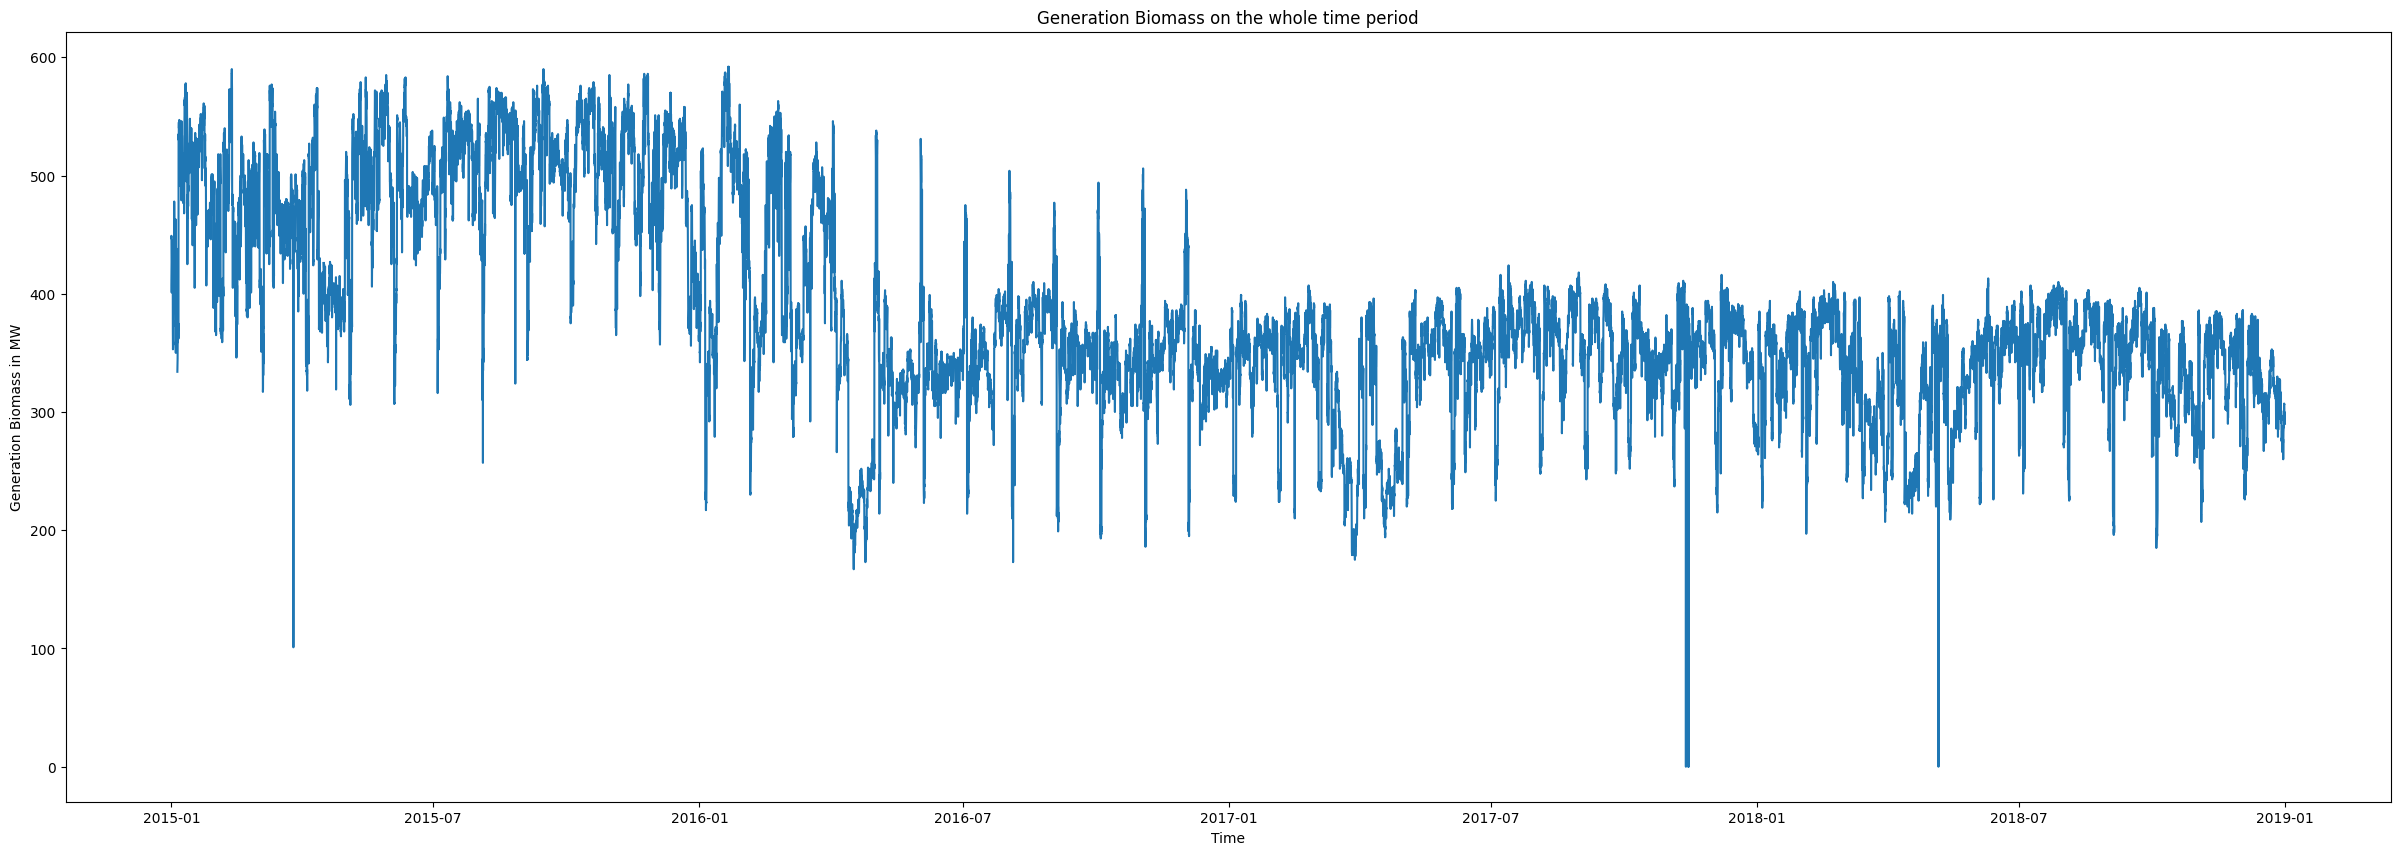

TypeError: '<' not supported between instances of 'datetime.datetime' and 'str'

<Figure size 3000x1000 with 0 Axes>

In [345]:
#Plotting generation biomass on the whole time period
plt.figure(figsize=(30, 10))
plt.plot(energy_df['generation biomass'])
plt.title('Generation Biomass on the whole time period')
plt.xlabel('Time')
plt.ylabel('Generation Biomass in MW')
plt.show()

#Plotting generation biomass between 2017 and 2019
plt.figure(figsize=(30, 10))
plt.plot(energy_df['generation biomass']['2017':'2019'])
plt.title('Generation Biomass between 2017 and 2019')
plt.xlabel('Time')  
plt.ylabel('Generation Biomass in MW')
plt.show()

#Plotting generation biomass on 2017
plt.figure(figsize=(30, 10))
plt.plot(energy_df['generation biomass']['2017'])
plt.title('Generation Biomass on 2017')
plt.xlabel('Time')
plt.ylabel('Generation Biomass in MW')
plt.show()

#Plotting generation biomass June 2017
plt.figure(figsize=(30, 10))
plt.plot(energy_df['generation biomass']['2017-06'])
plt.title('Generation Biomass June 2017')
plt.xlabel('Time')
plt.ylabel('Generation Biomass in MW')
plt.show()

We can clearly observe a cycle of around 2 years. We can also clearly observe seasonalities within each year, month and week.

#### Fossil gas generation 

In [ ]:
#Plotting Gas Generation on the whole time period
plt.figure(figsize=(9, 3))
plt.plot(energy_df['generation fossil gas'], label='Fossil Gas')
plt.title('Fossil Gas Generation on the whole time period')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the year 2015 and 2016
plt.figure(figsize=(9, 3))
plt.plot(energy_df['generation fossil gas']['2015':'2016'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the year 2015 and 2016')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the years, 2015, 2016 and 2017
plt.figure(figsize=(9, 3))
plt.plot(energy_df['generation fossil gas']['2015':'2017'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the years, 2015, 2016 and 2017')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the year of 2015
plt.figure(figsize=(9, 3))
plt.plot(energy_df['generation fossil gas']['2015-01-01':'2015-12-31'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the year of 2015')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the month of January 2015
plt.figure(figsize=(9, 3))
plt.plot(energy_df['generation fossil gas']['2015-01-01':'2015-01-31'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the month of January 2015')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the 1st week of January 2015
plt.figure(figsize=(9, 3))
plt.plot(energy_df['generation fossil gas']['2015-01-01':'2015-01-07'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the 1st week of January 2015')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the 1st day of January 2015
plt.figure(figsize=(9, 3))
plt.plot(energy_df['generation fossil gas']['2015-01-01':'2015-01-01'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the 1st day of January 2015')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

plt.show()

The Fossil Gas Generation shows strong seasonality within each month and each year. 

We can say the samething for the other generation types, forecasts and prices.

Same thing for the weather data.

### Seasonal plot

##### Yearly Seasonal plot

In [ ]:
#deep copy of the energy dataset
yearly_plot_df = energy_df.copy(deep=True)

#extract year and month from the index
yearly_plot_df['year'] = yearly_plot_df.index.year
yearly_plot_df['month'] = yearly_plot_df.index.month

#group by year and month to get the average price for each month
monthly_data = yearly_plot_df.groupby(['year', 'month']).mean()

#plotting the average data for each month and each data
for col in monthly_data.columns:
    plt.figure(figsize=(8, 4))
    for year in yearly_plot_df.index.year.unique():  
        yearly_data = monthly_data[monthly_data.index.get_level_values('year') == year]
        plt.plot( yearly_data.index.get_level_values('month'), yearly_data[col], label=f'Year {year}')
    plt.legend(fontsize='small')
    plt.xlabel('Month')
    plt.ylabel(f'{col}')
    plt.title(f'Average {col} per month')
plt.show()


##### Monthly Seasonal plot

In [ ]:
#deep copy of the energy dataset
monthly_plot_df = energy_df.copy(deep=True)

#extract month and day from the index
monthly_plot_df['month'] = monthly_plot_df.index.month
monthly_plot_df['day'] = monthly_plot_df.index.day

#group by year and month to get the average price for each month
monthly_data = monthly_plot_df.groupby(['month', 'day']).mean()

#plotting the average data for each month and each data
for col in monthly_data.columns:
    plt.figure(figsize=(8, 4))
    for month in monthly_plot_df.index.month.unique():  
        month_data = monthly_data[monthly_data.index.get_level_values('month') == month]
        plt.plot( month_data.index.get_level_values('day'), month_data[col], label=f'Month {month}')
    plt.legend(fontsize='small')
    plt.xlabel('Day')
    plt.ylabel(f'{col}')
    plt.title(f'Average {col} per day during the month')
plt.show()

### Relationship between the variables

#### Relationship between energy and temperature

In [ ]:
print(len(energy_df), len(weather_df[(weather_df.index.get_level_values('city_name') == 'Madrid') & (weather_df.index.get_level_values('dt_iso').isin(energy_df.index))]))

35064 36267


In [ ]:
weather_df.index

MultiIndex([('Valencia', 2015-01-01 00:00:00+01:00),
            ('Valencia', 2015-01-01 01:00:00+01:00),
            ('Valencia', 2015-01-01 02:00:00+01:00),
            ('Valencia', 2015-01-01 03:00:00+01:00),
            ('Valencia', 2015-01-01 04:00:00+01:00),
            ('Valencia', 2015-01-01 05:00:00+01:00),
            ('Valencia', 2015-01-01 06:00:00+01:00),
            ('Valencia', 2015-01-01 07:00:00+01:00),
            ('Valencia', 2015-01-01 08:00:00+01:00),
            ('Valencia', 2015-01-01 09:00:00+01:00),
            ...
            ( 'Seville', 2018-12-31 14:00:00+01:00),
            ( 'Seville', 2018-12-31 15:00:00+01:00),
            ( 'Seville', 2018-12-31 16:00:00+01:00),
            ( 'Seville', 2018-12-31 17:00:00+01:00),
            ( 'Seville', 2018-12-31 18:00:00+01:00),
            ( 'Seville', 2018-12-31 19:00:00+01:00),
            ( 'Seville', 2018-12-31 20:00:00+01:00),
            ( 'Seville', 2018-12-31 21:00:00+01:00),
            ( 'Seville', 2018-

In [ ]:
weather_df.index.get_level_values('dt_iso')[0]

datetime.datetime(2015, 1, 1, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))

In [ ]:
datetime.fromisoformat('2018-12-31 22:00:00+02:00')

datetime.datetime(2018, 12, 31, 22, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))

ValueError: x and y must be the same size

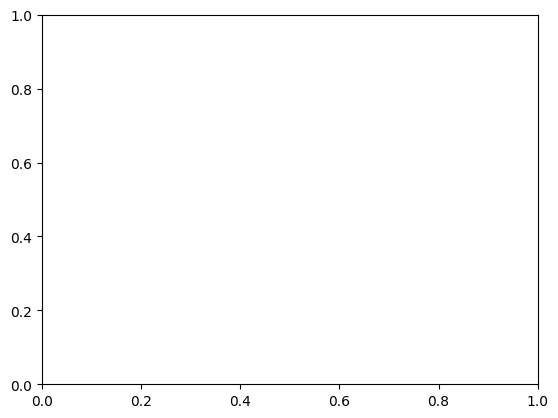

In [ ]:
plt.scatter(weather_df[(weather_df.index.get_level_values('city_name') == 'Madrid') & (weather_df.index.get_level_values('dt_iso').isin(energy_df.index))]['temp'], energy_df['generation biomass'])